<img src="https://i.postimg.cc/qMWR3d1G/logo.png" width="300" height="200"/>

<h1>Racismo estrutural no Brasil: evidências e desafios</h1>

O Brasil é conhecido mundialmente pela sua **diversidade cultural** e **racial**, mas também é um país marcado por profundas **desigualdades sociais**. Embora muitos acreditem que o **racismo** não é um problema no país, há diversas evidências que apontam para sua existência. 

Inclusive, um caso recente de [trabalho análogo à escravidão em vinículas na região sul do país](https://www.dw.com/pt-br/o-que-se-sabe-sobre-caso-de-trabalho-análogo-à-escravidão-no-rs/a-64865707), onde nordestinos, em sua maioria homens pretos, foram submetidos a trabalhos em condições desumanas, sofrendo violência física e ameaças à vida, é o mais recente lembrete doloroso do **racismo estrutural que ainda permeia nossa sociedade.**

O **racismo estrutural** é caracterizado pela presença de práticas discriminatórias enraizadas nas estruturas **sociais** e **econômicas**, que prejudicam grupos raciais específicos e perpetuam desigualdades históricas. Na prática, isso significa que pessoas negras são prejudicadas em diversas esferas da sociedade, desde a economia até a segurança pública.

Com isso, acredito na **Análise de Dados** não apenas como uma ferramenta utilizada para gerar insights de negócios ou soluções estratégicas, mas também a vejo como **peça fundamental** para buscar entender essas e outras realidades **impactadads pelo racismo estrutural no Brasil**. Por isso me dedico neste projeto a avaliar alguns indicadores **econômicos**, **demográficos** e **sociais**, para identificar **padrões** e **tendências** que possam revelar as **desigualdades raciais** presentes em nossa sociedade.
 


<img src="https://blogdaengenharia.com/wp-content/uploads/2020/09/Racismo-1.png" width="500" alt="cognitiveclass.ai logo"  />

**Perguntas norteadoras do projeto:**
- Ainda hoje existe **racismo**?
- O que os **dados da população** dizem a respeito?
- É **importante** falar sobre isso hoje?

**Perguntas importantes para obtenção dos dados para o projeto:**
- que tipo de **dados** iremos investigar? 
- onde **obter** os dados? 
- como **coletar** esses dados? 

Respondendo essas perguntas, o objetivo foi abordar **dados oficiais** que foram obtidos através dos sites do [IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/25844-desigualdades-sociais-por-cor-ou-raca.html) e [IPEA](https://www.ipea.gov.br/atlasviolencia/), entre os anos **2012** e **2018**, extraidos **manualmente** em formato de planilhas do **EXCEL**, que foram adaptadas de maneira a facilitar a criação dos dataframes e na manipulação dos dados.

A seguir apresento os resultados

## Imports e configurações

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

pd.set_option("display.max_columns", None)

## Conhecendo e tratando os dados

In [3]:
df = pd.read_excel('dados-desigualdade-racial-br-01.xlsx', engine='openpyxl') # Criando o dataframe a partir de arquivo do Excel

In [4]:
df.sample(5)

ano    regiao                 UF   etnia    %_etnia  %_desocupacao  \
221  2016       Sul     Santa Catarina   Preta  15.561085       9.727150   
131  2014     Norte           Rondônia   Preta  70.345660       4.118645   
140  2014  Nordeste              Ceará  Branca  28.729028       6.985516   
56   2013       Sul  Rio Grande do Sul  Branca  84.253612       4.273419   
16   2012     Norte              Amapá  Branca  16.821698      12.970582   

     %_subutilizacao  $_renda_med_formal  $_renda_med_informal  \
221        14.917317         1882.945559           1411.263458   
131        10.273117         1939.767376           1225.322188   
140        19.749109         2685.286846           1068.508569   
56         11.126718         2750.035173           1703.392136   
16         19.982926         3021.442462           1845.219617   

     %_menor_renda_familiar  %_maior_renda_familiar  %_taxa_homicidio  
221               30.360544                5.531749             22.36  
131               76.237349               58.078363             34.68  
140               19.614789               48.832401             10.68  
56                72.296420               94.094417             18.97  
16                12.773766               28.462291             17.16

**INFORMAÇÕES SOBRE AS VARIÁVEIS ESTUDADAS**

**VARIÁVEIS DESCRITIVAS:**

**ano**: Categórica

**regiao**: Categórica

**ufs**: Categórica

**etnia**: Categórica

**VARIÁVEIS DOS INDICADORES:**

**%_etnia**: Numérica
- Porcentagem da população por Etnia nas UFs.

**%_desocupacao**: Numérica
- Porcentagem de pessoas que possuem força de trabalho, mas que estão desempregadas (ou seja, que estão em busca de trabalho e podem trabalhar).

**%_subutilizacao**: Numérica
- Porcentagem de pessoas que trabalham em menor quantidade de tempo do que poderiam (ou seja, que tem não trabalham durante todo o tempo possível, mesmo tendo disponibilidade).

**renda_med_formal**: Numérica
- Rendimento médio real habitual do trabalho principal das pessoas de 14 anos ou mais de idade, ocupadas na semana de referência e em trabalhos formais (R$).

**renda_med_informal**: Numérica
- Rendimento médio real habitual do trabalho principal das pessoas de 14 anos ou mais de idade, ocupadas na semana de referência e em trabalhos informais (R$).

**%_menor_renda_familiar**: numérica
- Porcentagem das pessoas, líderes de família, por etnia, entre as famílias que possuem as 10% menores rendas.

**%_maior_renda_familiar**: numérica
- Porcentagem das pessoas, líderes de família, por etnia, entre as famílias que possuem as 10% maiores rendas.

**%_taxa_homicidio**: numérica
-  quantidade de homicídios classificados como dolosos (praticados voluntária ou intencionalmente, por qualquer instrumento ou meio) para cada 100 mil habitantes (ou seja, nº de homicios (branco/preto) * 100.000 / população).

In [5]:
df.shape

(378, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ano                     378 non-null    int64  
 1   regiao                  378 non-null    object 
 2   UF                      378 non-null    object 
 3   etnia                   378 non-null    object 
 4   %_etnia                 378 non-null    float64
 5   %_desocupacao           378 non-null    float64
 6   %_subutilizacao         378 non-null    float64
 7   $_renda_med_formal      378 non-null    float64
 8   $_renda_med_informal    378 non-null    float64
 9   %_menor_renda_familiar  378 non-null    float64
 10  %_maior_renda_familiar  378 non-null    float64
 11  %_taxa_homicidio        378 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 35.6+ KB


In [7]:
df.nunique()

ano                         7
regiao                      5
UF                         27
etnia                       2
%_etnia                   378
%_desocupacao             378
%_subutilizacao           378
$_renda_med_formal        378
$_renda_med_informal      378
%_menor_renda_familiar    378
%_maior_renda_familiar    378
%_taxa_homicidio          365
dtype: int64

In [8]:
df["ano"].unique()

array([2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [9]:
df["regiao"].unique()

array(['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste'],
      dtype=object)

In [10]:
df["UF"].unique()

array(['Paraná', 'Rio Grande do Sul', 'Santa Catarina', 'Espírito Santo',
       'Minas Gerais', 'Rio de Janeiro', 'São Paulo', 'Acre', 'Amapá',
       'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins', 'Alagoas',
       'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí',
       'Rio Grande do Norte', 'Sergipe', 'Distrito Federal', 'Goiás',
       'Mato Grosso', 'Mato Grosso do Sul'], dtype=object)

In [11]:
df.isna().sum()

ano                       0
regiao                    0
UF                        0
etnia                     0
%_etnia                   0
%_desocupacao             0
%_subutilizacao           0
$_renda_med_formal        0
$_renda_med_informal      0
%_menor_renda_familiar    0
%_maior_renda_familiar    0
%_taxa_homicidio          0
dtype: int64

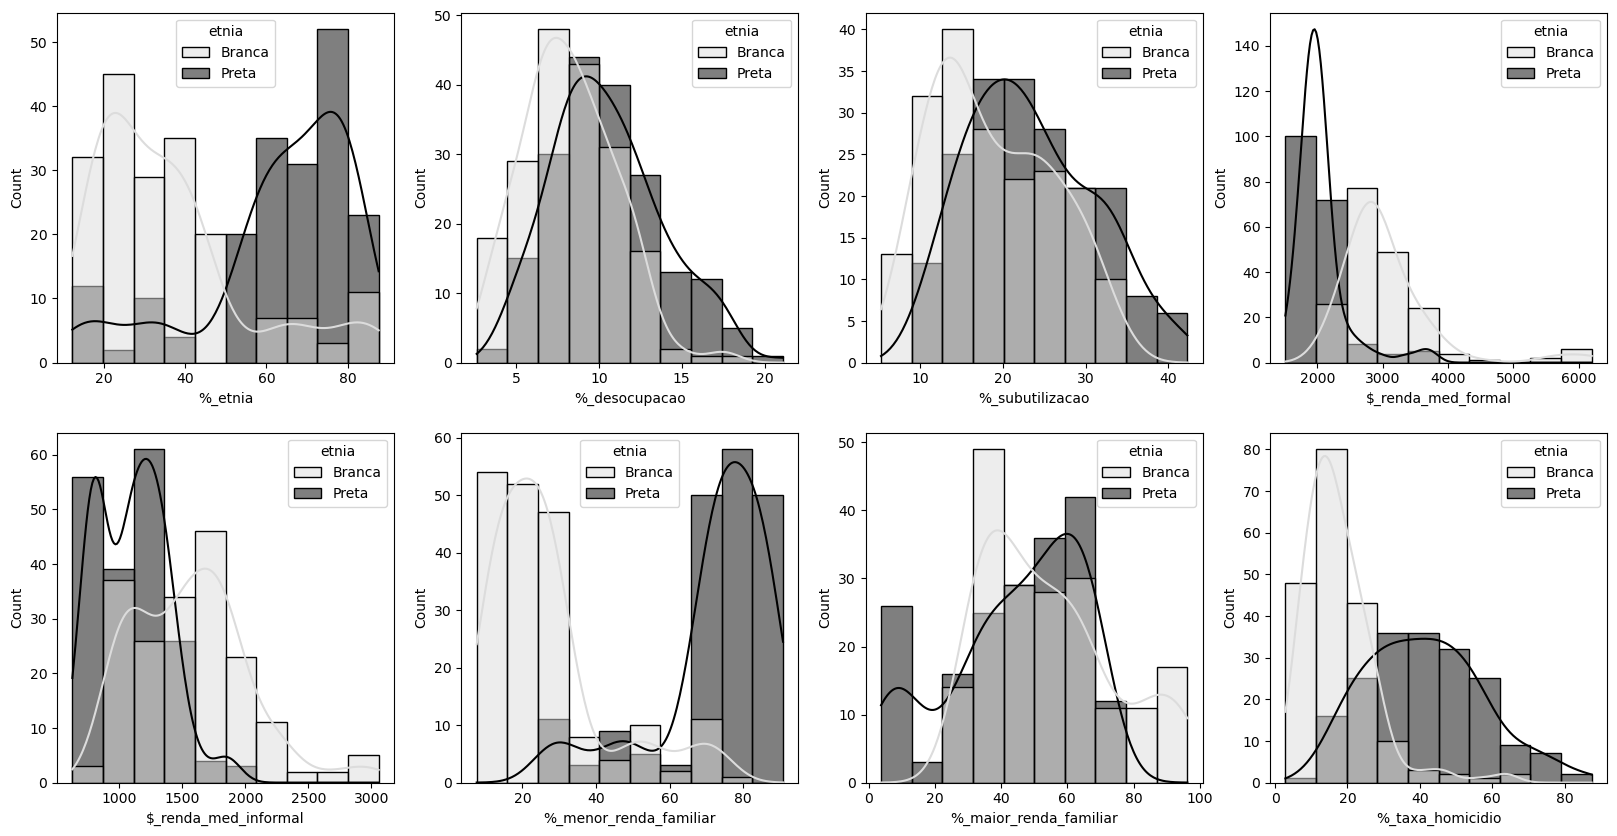

In [12]:
#Vericando a distribuição dos valores na tabela:

dfn = df.iloc[:,3:] #utilizando apenas os dados numéricos

fig, axes = plt.subplots(nrows = 2, ncols = 4 , figsize = (20,10))

column=0
row = 0
for col in dfn.columns[1:]:
  # seaborn para fazer os plots dentro de cada "ax" (em "axes")
  sns.histplot(data = dfn, x=col, ax=axes[row,column], 
  hue = 'etnia', kde = True,
  palette = {'Preta':'black', 'Branca':'gainsboro'}, 
  bins=10,
  #colors = ['gainsboro', 'dimgray']
  )

  if column < 3:
    column += 1
  else: 
    column = 0
    row += 1

## Investigando traços de racismo estrutural nas Regiões no Brasil

### Resumo dos dados por Regiões

In [13]:
df_regiao_sumary = df.groupby(['regiao','etnia']).mean()
df_regiao_sumary = df_regiao_sumary.iloc[:,1:]
df_regiao_sumary.head(10)

%_etnia  %_desocupacao  %_subutilizacao  \
regiao       etnia                                               
Centro-Oeste Branca  38.784523       6.497817        12.841540   
             Preta   60.234820       8.725655        16.248192   
Nordeste     Branca  26.651146       9.663110        26.309436   
             Preta   72.912343      11.588714        31.198055   
Norte        Branca  21.451890       8.823411        18.807008   
             Preta   77.024526      10.408618        22.650140   
Sudeste      Branca  47.319693       7.698828        13.584090   
             Preta   51.989537      11.395624        19.046478   
Sul          Branca  78.328495       5.277042        10.795726   
             Preta   21.094814       8.524888        16.856060   

                     $_renda_med_formal  $_renda_med_informal  \
regiao       etnia                                              
Centro-Oeste Branca         3677.386992           2131.014825   
             Preta          2456.226534           1471.845223   
Nordeste     Branca         2651.174049           1092.399373   
             Preta          1832.928988            796.600307   
Norte        Branca         3245.897253           1598.972893   
             Preta          2205.418966           1124.329382   
Sudeste      Branca         3190.811696           1853.404457   
             Preta          1987.725005           1238.882264   
Sul          Branca         2755.508440           1754.271855   
             Preta          1891.392368           1274.358598   

                     %_menor_renda_familiar  %_maior_renda_familiar  \
regiao       etnia                                                    
Centro-Oeste Branca               26.804306               61.457226   
             Preta                72.160778               36.814368   
Nordeste     Branca               21.018559               43.457151   
             Preta                78.600295               55.958479   
Norte        Branca               14.118143               37.726684   
             Preta                83.242037               61.235440   
Sudeste      Branca               32.197981               73.009303   
             Preta                67.332438               25.577085   
Sul          Branca               64.010899               91.476499   
             Preta                35.436220                7.637229   

                     %_taxa_homicidio  
regiao       etnia                     
Centro-Oeste Branca         19.216071  
             Preta          40.715714  
Nordeste     Branca         11.797937  
             Preta          50.296825  
Norte        Branca         24.800204  
             Preta          42.271224  
Sudeste      Branca         13.665000  
             Preta          34.291071  
Sul          Branca         21.370000  
             Preta          23.666667

### A realidade do colorismo nas regiões do Brasil:

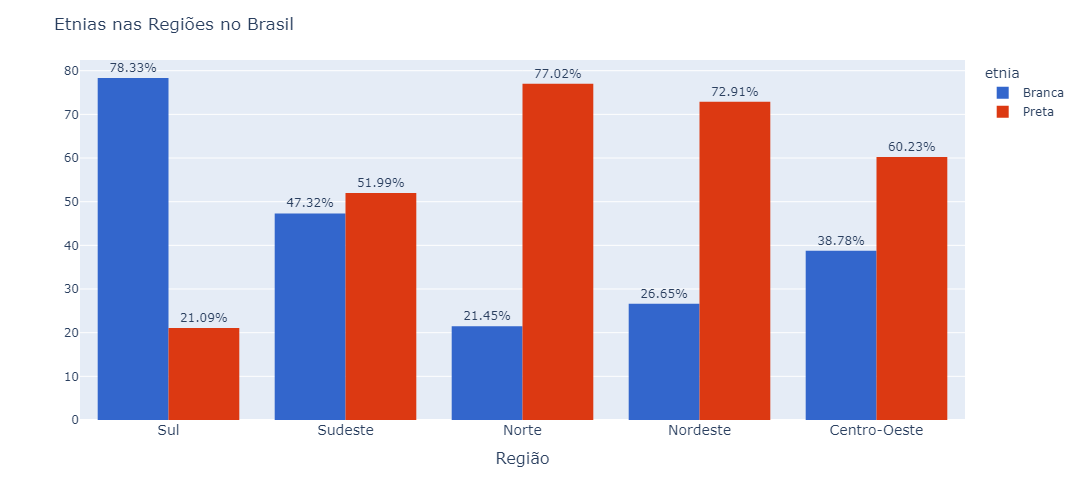

In [14]:
fig = px.histogram(df, x="regiao", y="%_etnia",
             color='etnia', barmode='group',
             histfunc='avg',
             text_auto='.3s',
             height=500, color_discrete_sequence=px.colors.qualitative.G10)

fig.update_layout(
    title='Etnias nas Regiões no Brasil',
    yaxis=dict(title=''),
    xaxis=dict(
        title='Região',
        titlefont_size=16,
        tickfont_size=14)
)

fig.update_traces(texttemplate='%{y:.4s}%', textposition='outside')


fig.show()

### Qual população sofre mais com os problemas de emprego nas regiões do Brasil?

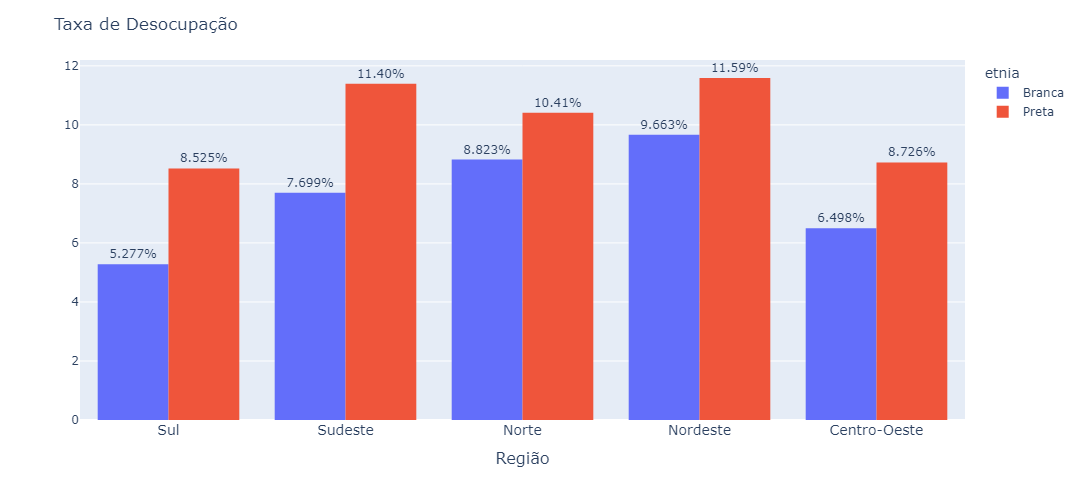

In [15]:
fig = px.histogram(df, x="regiao", y="%_desocupacao",
             color='etnia', barmode='group',
             histfunc='avg',
             text_auto='.3s',
             height=500)

fig.update_layout(
    title='Taxa de Desocupação',
    yaxis=dict(title=''),
    xaxis=dict(
        title='Região',
        titlefont_size=16,
        tickfont_size=14)
)

fig.update_traces(texttemplate='%{y:.4s}%', textposition='outside')
fig.show()

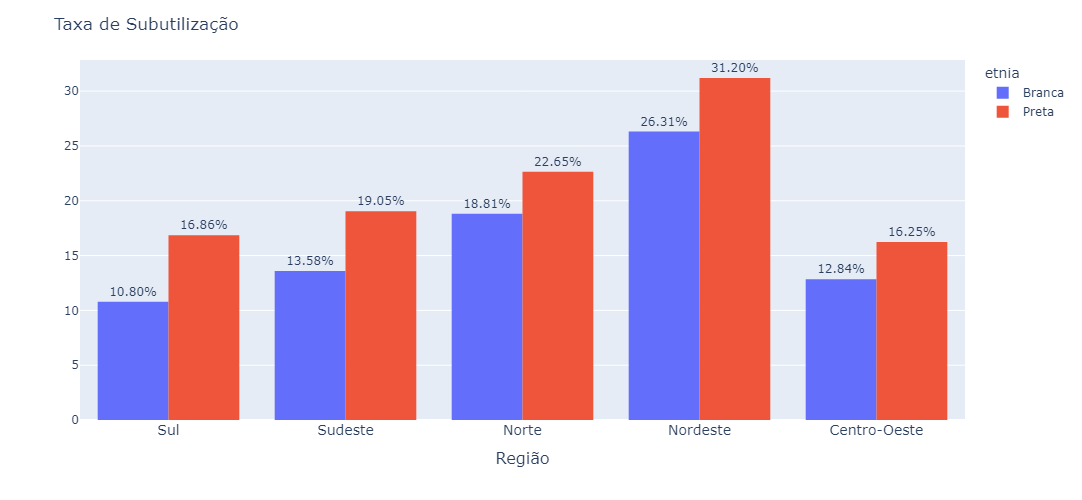

In [16]:
fig = px.histogram(df, x="regiao", y="%_subutilizacao",
             color='etnia', barmode='group',
             histfunc='avg',
             text_auto='.3s',
             height=500)

fig.update_layout(
    title='Taxa de Subutilização',
    yaxis=dict(title=''),
    xaxis=dict(
        title='Região',
        titlefont_size=16,
        tickfont_size=14)
)

fig.update_traces(texttemplate='%{y:.4s}%', textposition='outside')
fig.show()

### Qual o nível de violência (taxa de homincídio) nas regiões do Brasil?

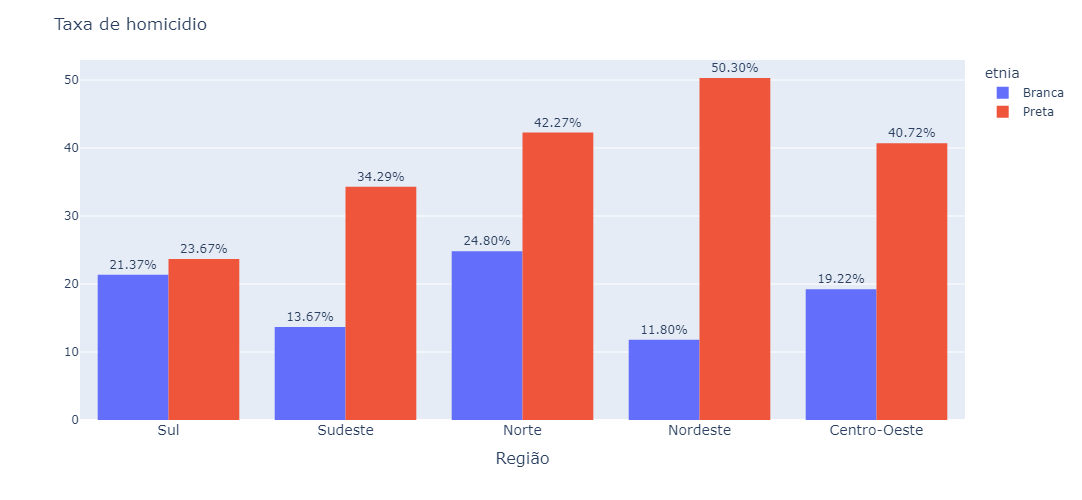

In [17]:
fig = px.histogram(df, x="regiao", y="%_taxa_homicidio",
             color='etnia', barmode='group',
             histfunc='avg',
             text_auto='.3s',
             height=500)

fig.update_layout(
    title='Taxa de homicidio',
    yaxis=dict(title=''),
    xaxis=dict(
        title='Região',
        titlefont_size=16,
        tickfont_size=14)
)
fig.update_traces(texttemplate='%{y:.4s}%', textposition='outside')

fig.show()

### Quais os estados com maiores taxas de homicídio?

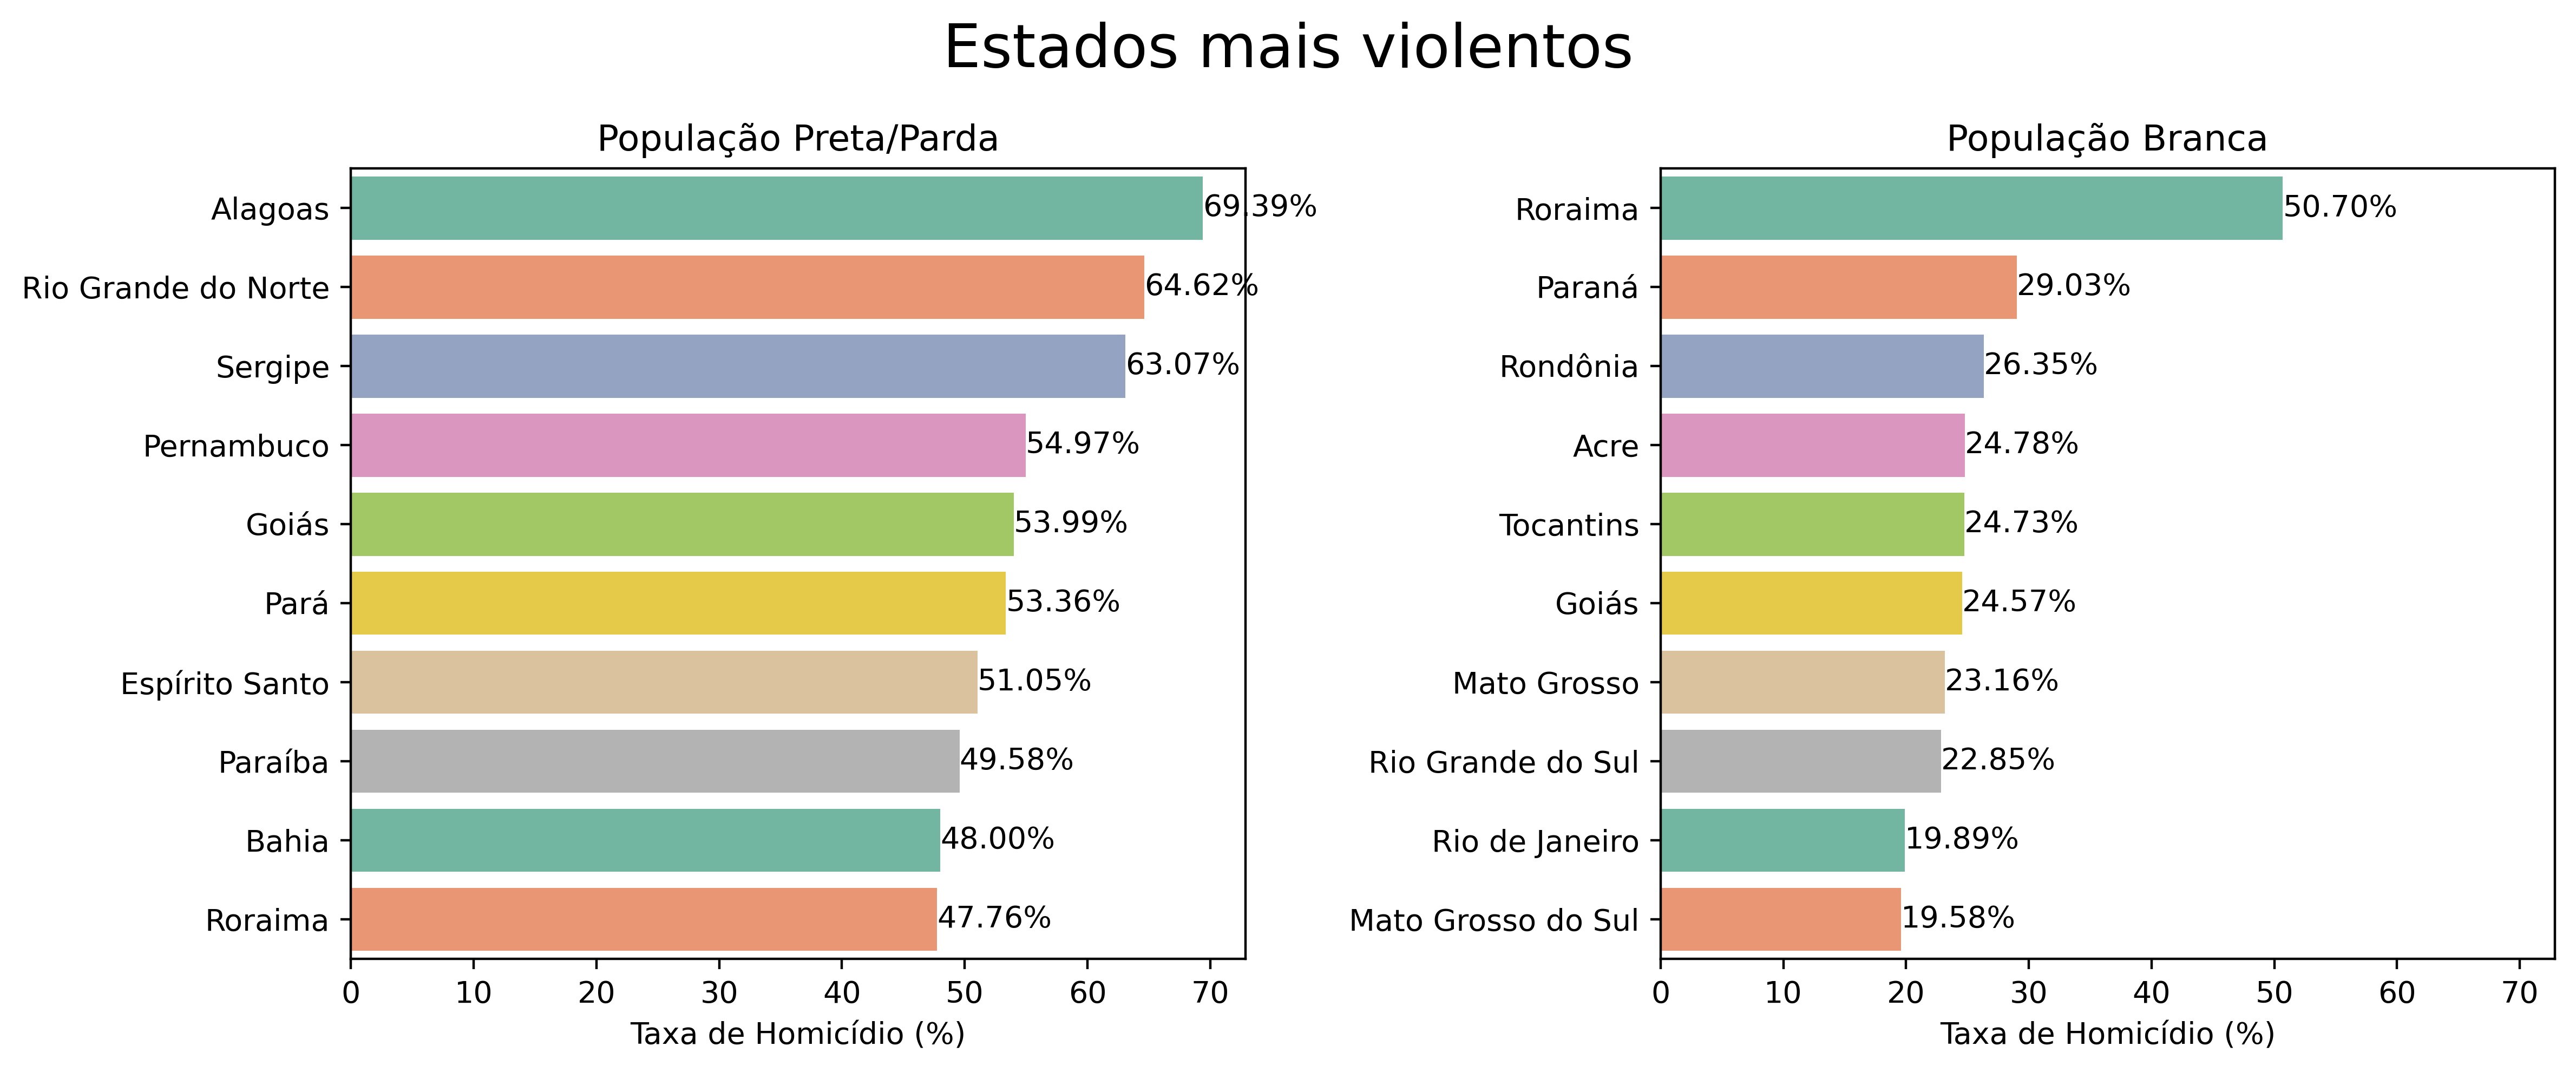

In [18]:
df_preta = df.loc[df['etnia'] =='Preta'].groupby('UF')[['%_taxa_homicidio']].mean()
df_preta = df_preta.sort_values(by='%_taxa_homicidio', ascending=False)
df_preta = df_preta.iloc[:10,:]

df_branca = df.loc[df['etnia'] =='Branca'].groupby('UF')[['%_taxa_homicidio']].mean()
df_branca = df_branca.sort_values(by='%_taxa_homicidio', ascending=False)
df_branca = df_branca.iloc[:10,:]

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=400, sharex=True)

ax = sns.barplot(ax=axes[0], y = df_preta.index , x = df_preta['%_taxa_homicidio'], data = df_preta, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%.2f%%')
ax.set_ylabel('')
ax.set_xlabel('Taxa de Homicídio (%)')
axes[0].set_title('População Preta/Parda')

ax = sns.barplot(ax=axes[1], y = df_branca.index , x = df_branca['%_taxa_homicidio'], data = df_branca, palette="Set2")
axes[1].set_title('População Branca')
ax.set_ylabel('')
ax.set_xlabel('Taxa de Homicídio (%)')
ax.bar_label(ax.containers[0], fmt = '%.2f%%')

fig.suptitle('Estados mais violentos', size = 20)

fig.tight_layout()

plt.show()

### Quais os estados mais seguros para cada população no Brasil?

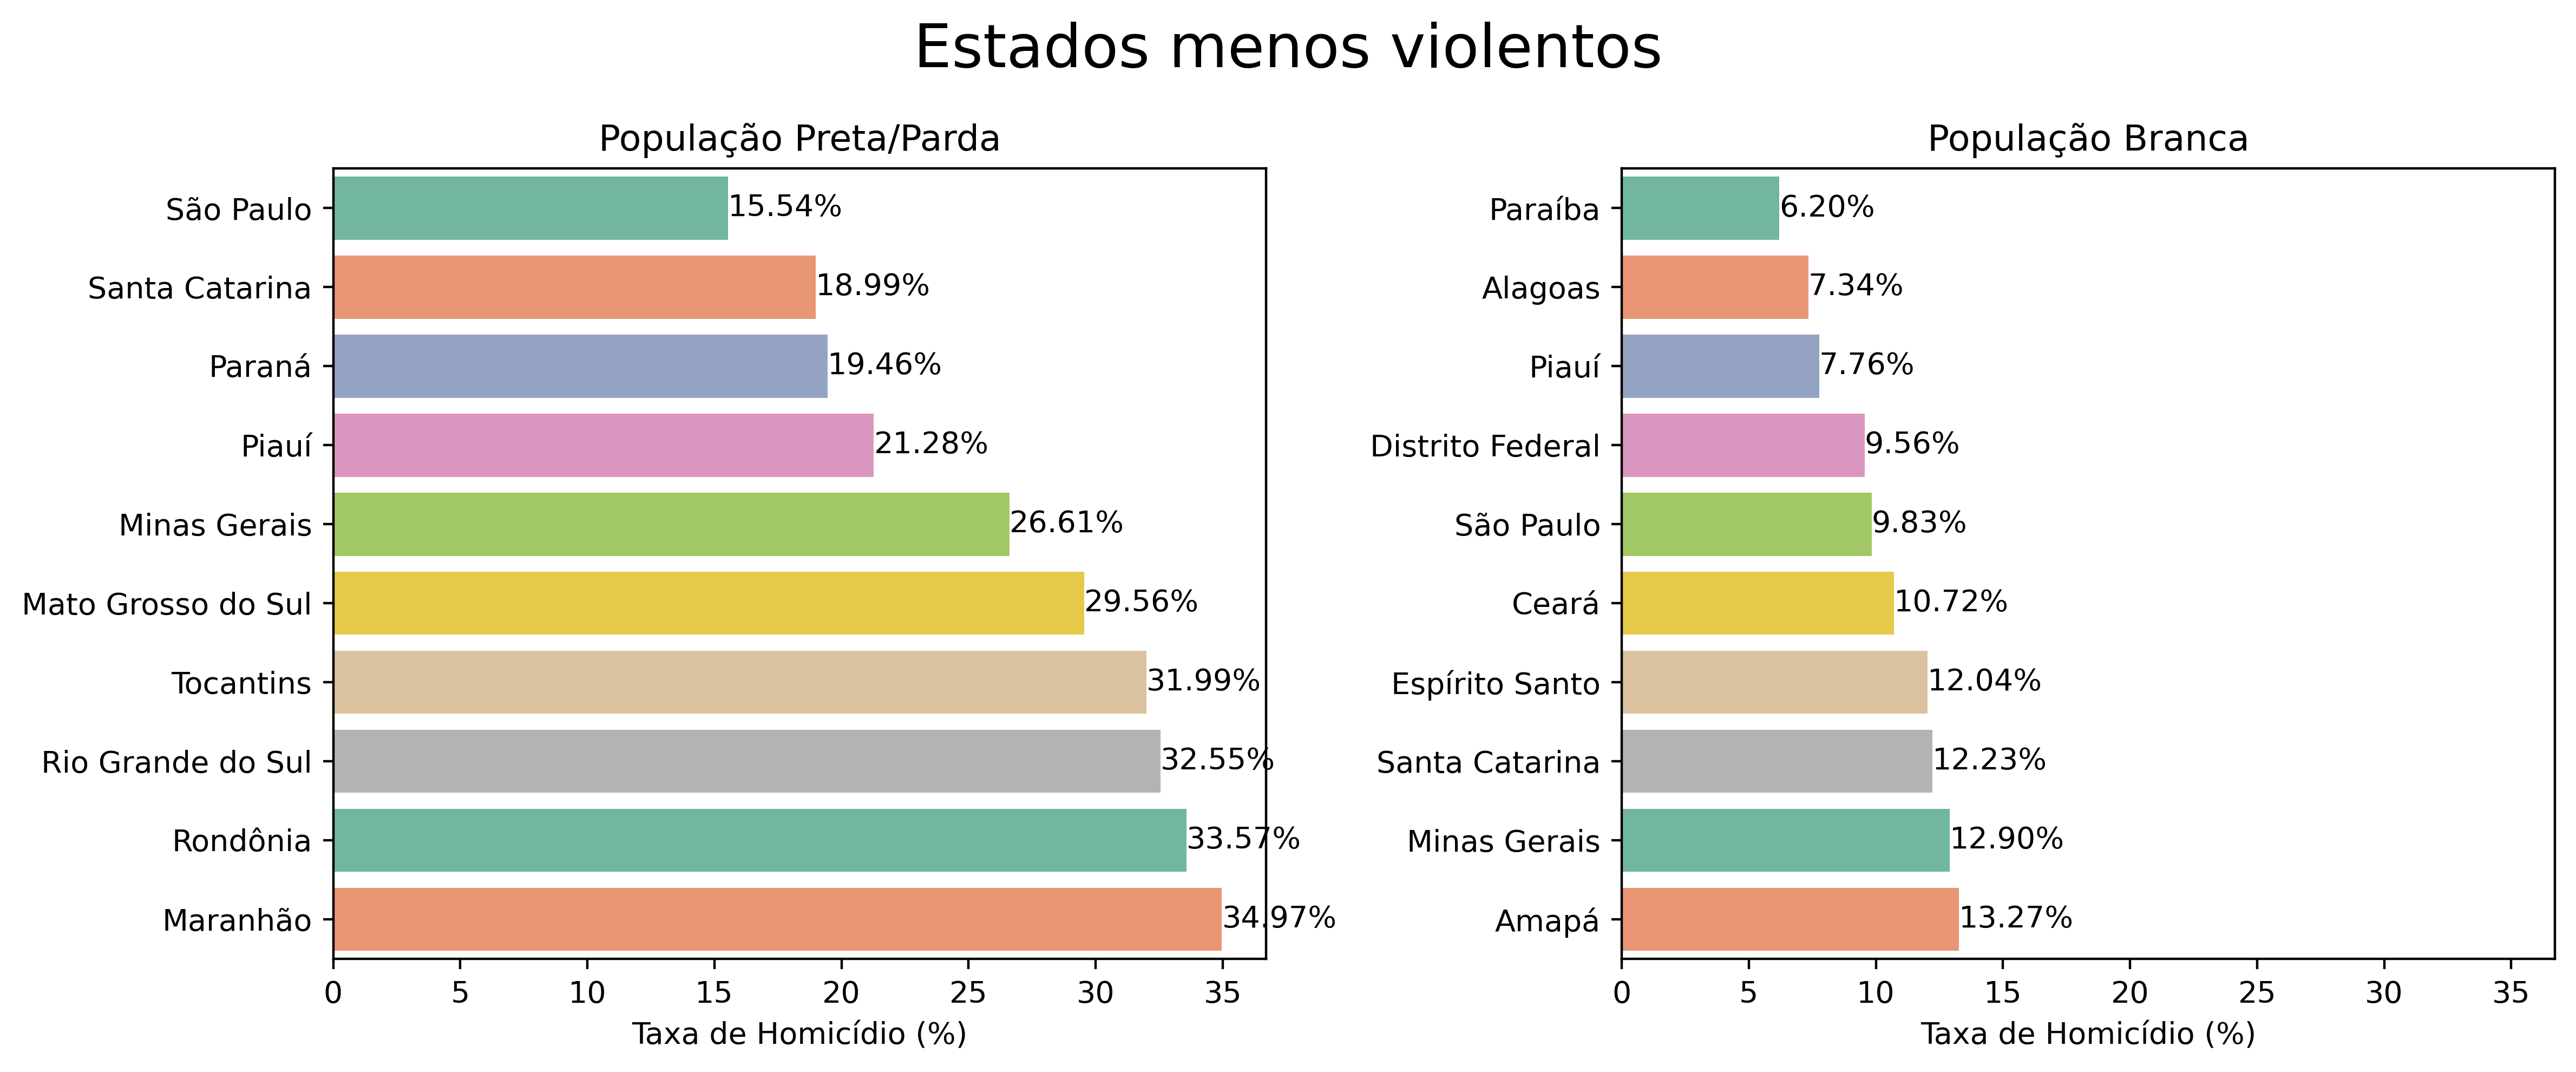

In [19]:
df_preta = df.loc[df['etnia'] =='Preta'].groupby('UF')[['%_taxa_homicidio']].mean()
df_preta = df_preta.sort_values(by='%_taxa_homicidio', ascending=True)
df_preta = df_preta.iloc[:10,:]

df_branca = df.loc[df['etnia'] =='Branca'].groupby('UF')[['%_taxa_homicidio']].mean()
df_branca = df_branca.sort_values(by='%_taxa_homicidio', ascending=True)
df_branca = df_branca.iloc[:10,:]

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=400, sharex=True)

ax = sns.barplot(ax=axes[0], y = df_preta.index , x = df_preta['%_taxa_homicidio'], data = df_preta, palette="Set2")
ax.bar_label(ax.containers[0], fmt = '%.2f%%')
ax.set_ylabel('')
ax.set_xlabel('Taxa de Homicídio (%)')
axes[0].set_title('População Preta/Parda')

ax = sns.barplot(ax=axes[1], y = df_branca.index , x = df_branca['%_taxa_homicidio'], data = df_branca, palette="Set2")
axes[1].set_title('População Branca')
ax.set_ylabel('')
ax.set_xlabel('Taxa de Homicídio (%)')
ax.bar_label(ax.containers[0], fmt = '%.2f%%')

fig.suptitle('Estados menos violentos', size = 20)

fig.tight_layout()

plt.show()

### Como está a distribuição de Renda nas Regiões do Brasil?

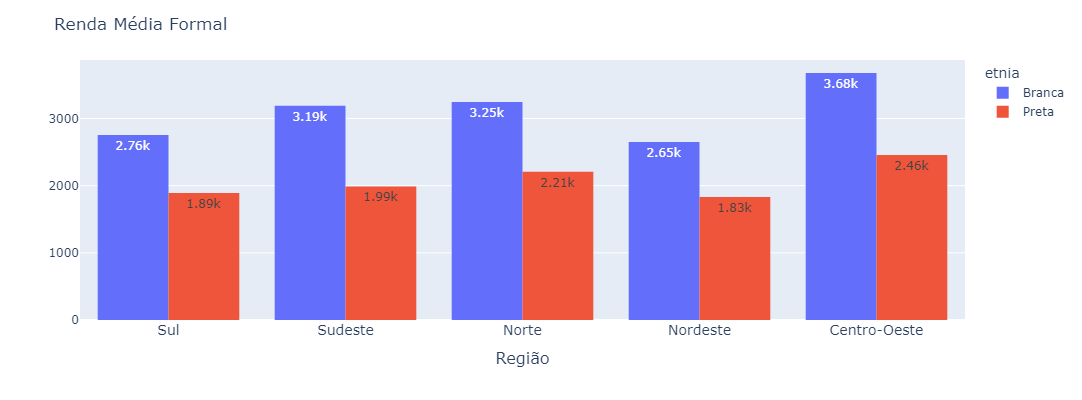

In [20]:
fig = px.histogram(df, x="regiao", y="$_renda_med_formal",
             color='etnia', barmode='group',
             histfunc='avg',
             text_auto='.3s',
             height=400
                  )

fig.update_layout( title='Renda Média Formal',
    yaxis=dict(title=''),
    xaxis=dict(
        title='Região',
        titlefont_size=16,
        tickfont_size=14)
                 )
fig.show()

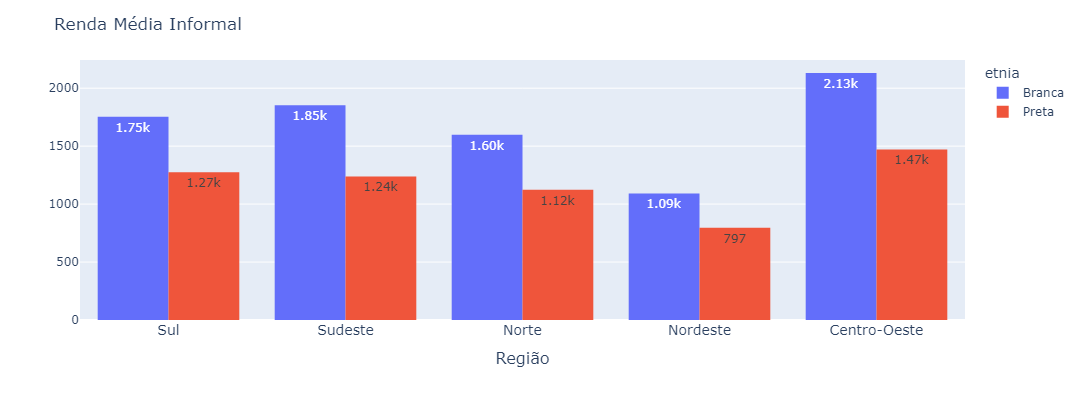

In [21]:
fig = px.histogram(df, x="regiao", y="$_renda_med_informal",
             color='etnia', barmode='group',
             histfunc='avg',
             text_auto='.3s',
             height=400)

fig.update_layout(
    title='Renda Média Informal',
    yaxis=dict(title=''),
    xaxis=dict(
        title='Região',
        titlefont_size=16,
        tickfont_size=14)
)


fig.show()

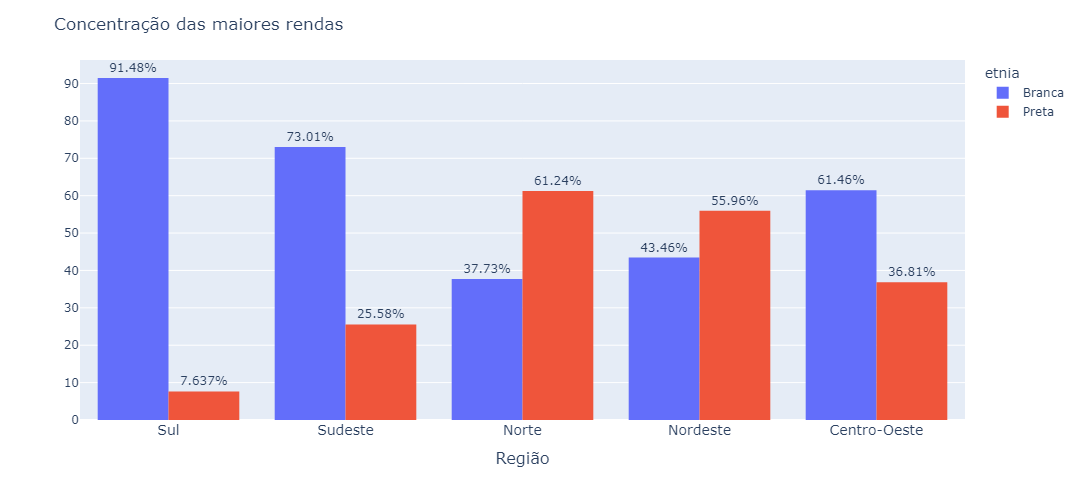

In [22]:
fig = px.histogram(df, x="regiao", y="%_maior_renda_familiar",
             color='etnia', barmode='group',
             histfunc='avg',
             text_auto='.3s',
             height=500)

fig.update_layout(
    title='Concentração das maiores rendas',
    yaxis=dict(title=''),
    xaxis=dict(
        title='Região',
        titlefont_size=16,
        tickfont_size=14)
)
fig.update_traces(texttemplate='%{y:.4s}%', textposition='outside')

fig.show()

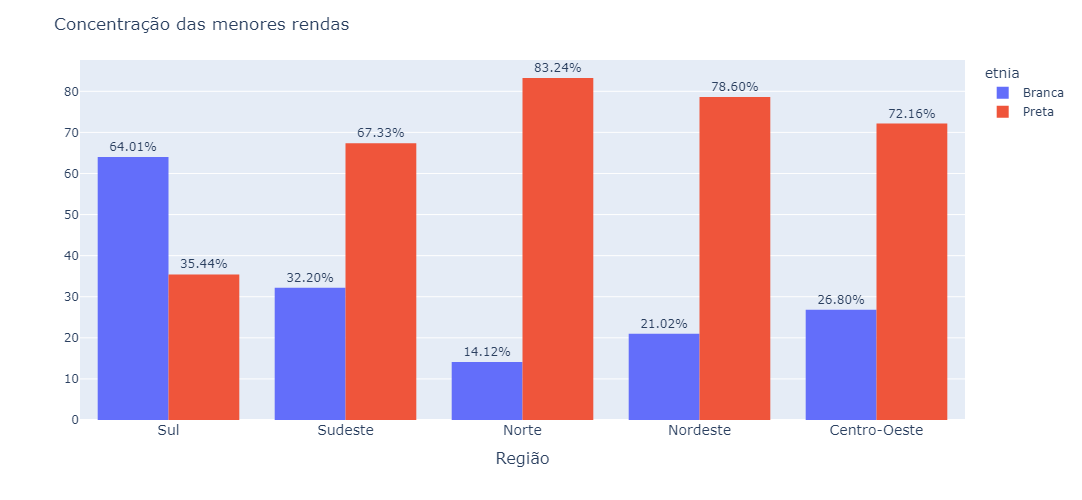

In [23]:
fig = px.histogram(df, x="regiao", y="%_menor_renda_familiar",
             color='etnia', barmode='group',
             histfunc='avg',
             text_auto='.3s',
             height=500)

fig.update_layout(
    title='Concentração das menores rendas',
    yaxis=dict(title=''),
    xaxis=dict(
        title='Região',
        titlefont_size=16,
        tickfont_size=14)
)
fig.update_traces(texttemplate='%{y:.4s}%', textposition='outside')


fig.show()

### Quais estados possuem os melhores salários para cada populaçao? E quanto seria a média?

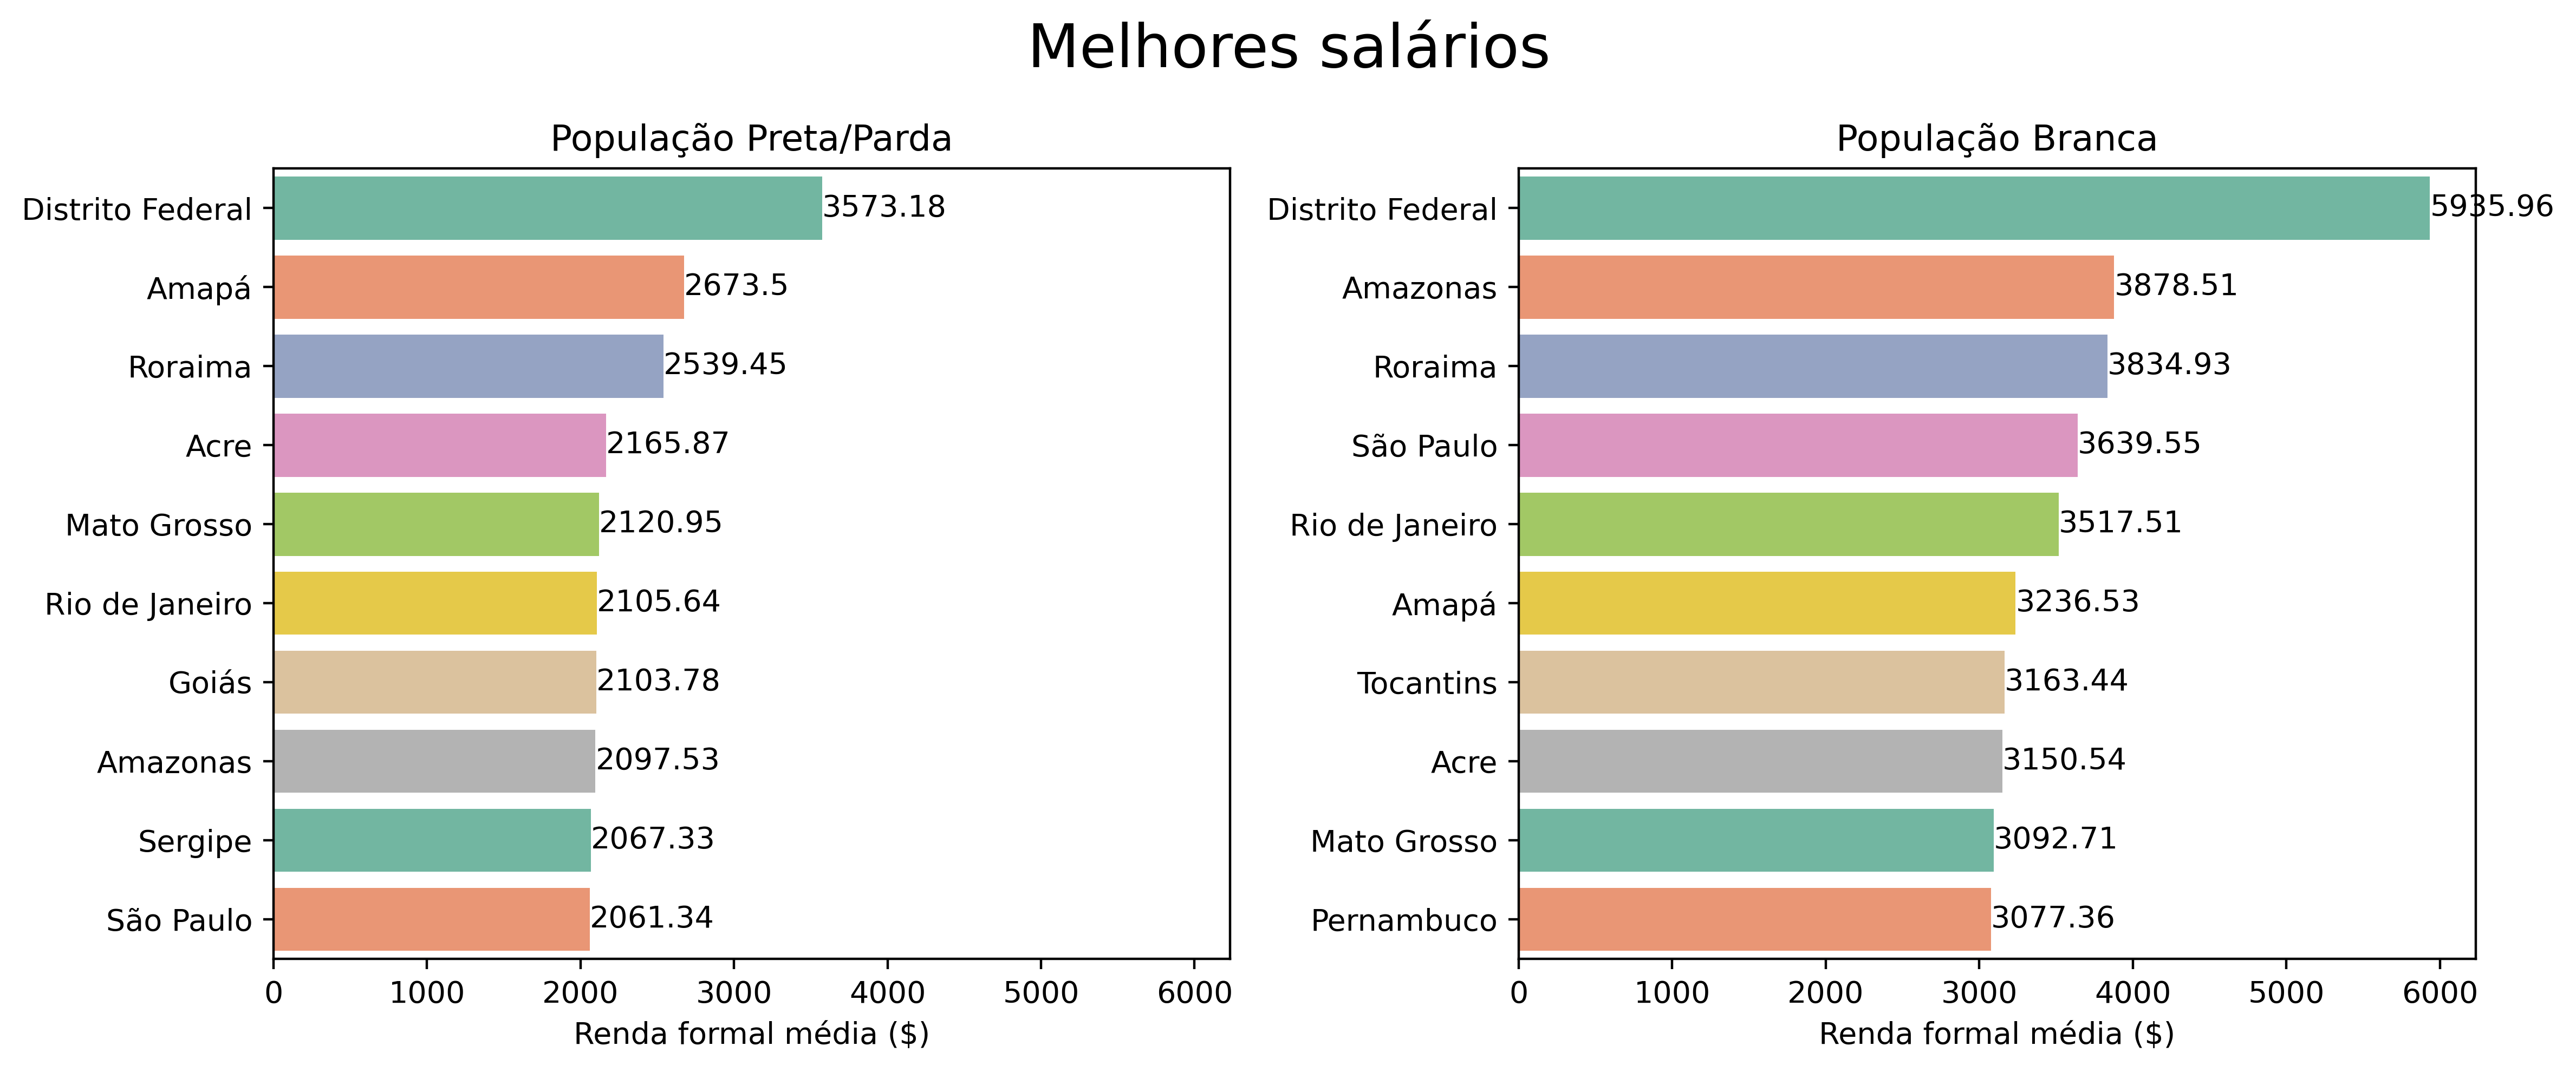

In [27]:
df_preta = df.loc[df['etnia'] =='Preta'].groupby('UF')[['$_renda_med_formal']].mean()
df_preta = df_preta.sort_values(by='$_renda_med_formal', ascending=False)
df_preta = df_preta.iloc[:10,:]

df_branca = df.loc[df['etnia'] =='Branca'].groupby('UF')[['$_renda_med_formal']].mean()
df_branca = df_branca.sort_values(by='$_renda_med_formal', ascending=False)
df_branca = df_branca.iloc[:10,:]

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=400, sharex=True)

ax = sns.barplot(ax=axes[0], y = df_preta.index , x = df_preta['$_renda_med_formal'], data = df_preta, palette="Set2")
ax.bar_label(ax.containers[0])
ax.set_ylabel('')
ax.set_xlabel('Renda formal média ($)')
axes[0].set_title('População Preta/Parda')

ax = sns.barplot(ax=axes[1], y = df_branca.index , x = df_branca['$_renda_med_formal'], data = df_branca, palette="Set2")
axes[1].set_title('População Branca')
ax.set_ylabel('')
ax.set_xlabel('Renda formal média ($)')
ax.bar_label(ax.containers[0])

fig.suptitle('Melhores salários', size = 20)

fig.tight_layout()

plt.show()

### Quais os estados com faixa salariais mais baixas?

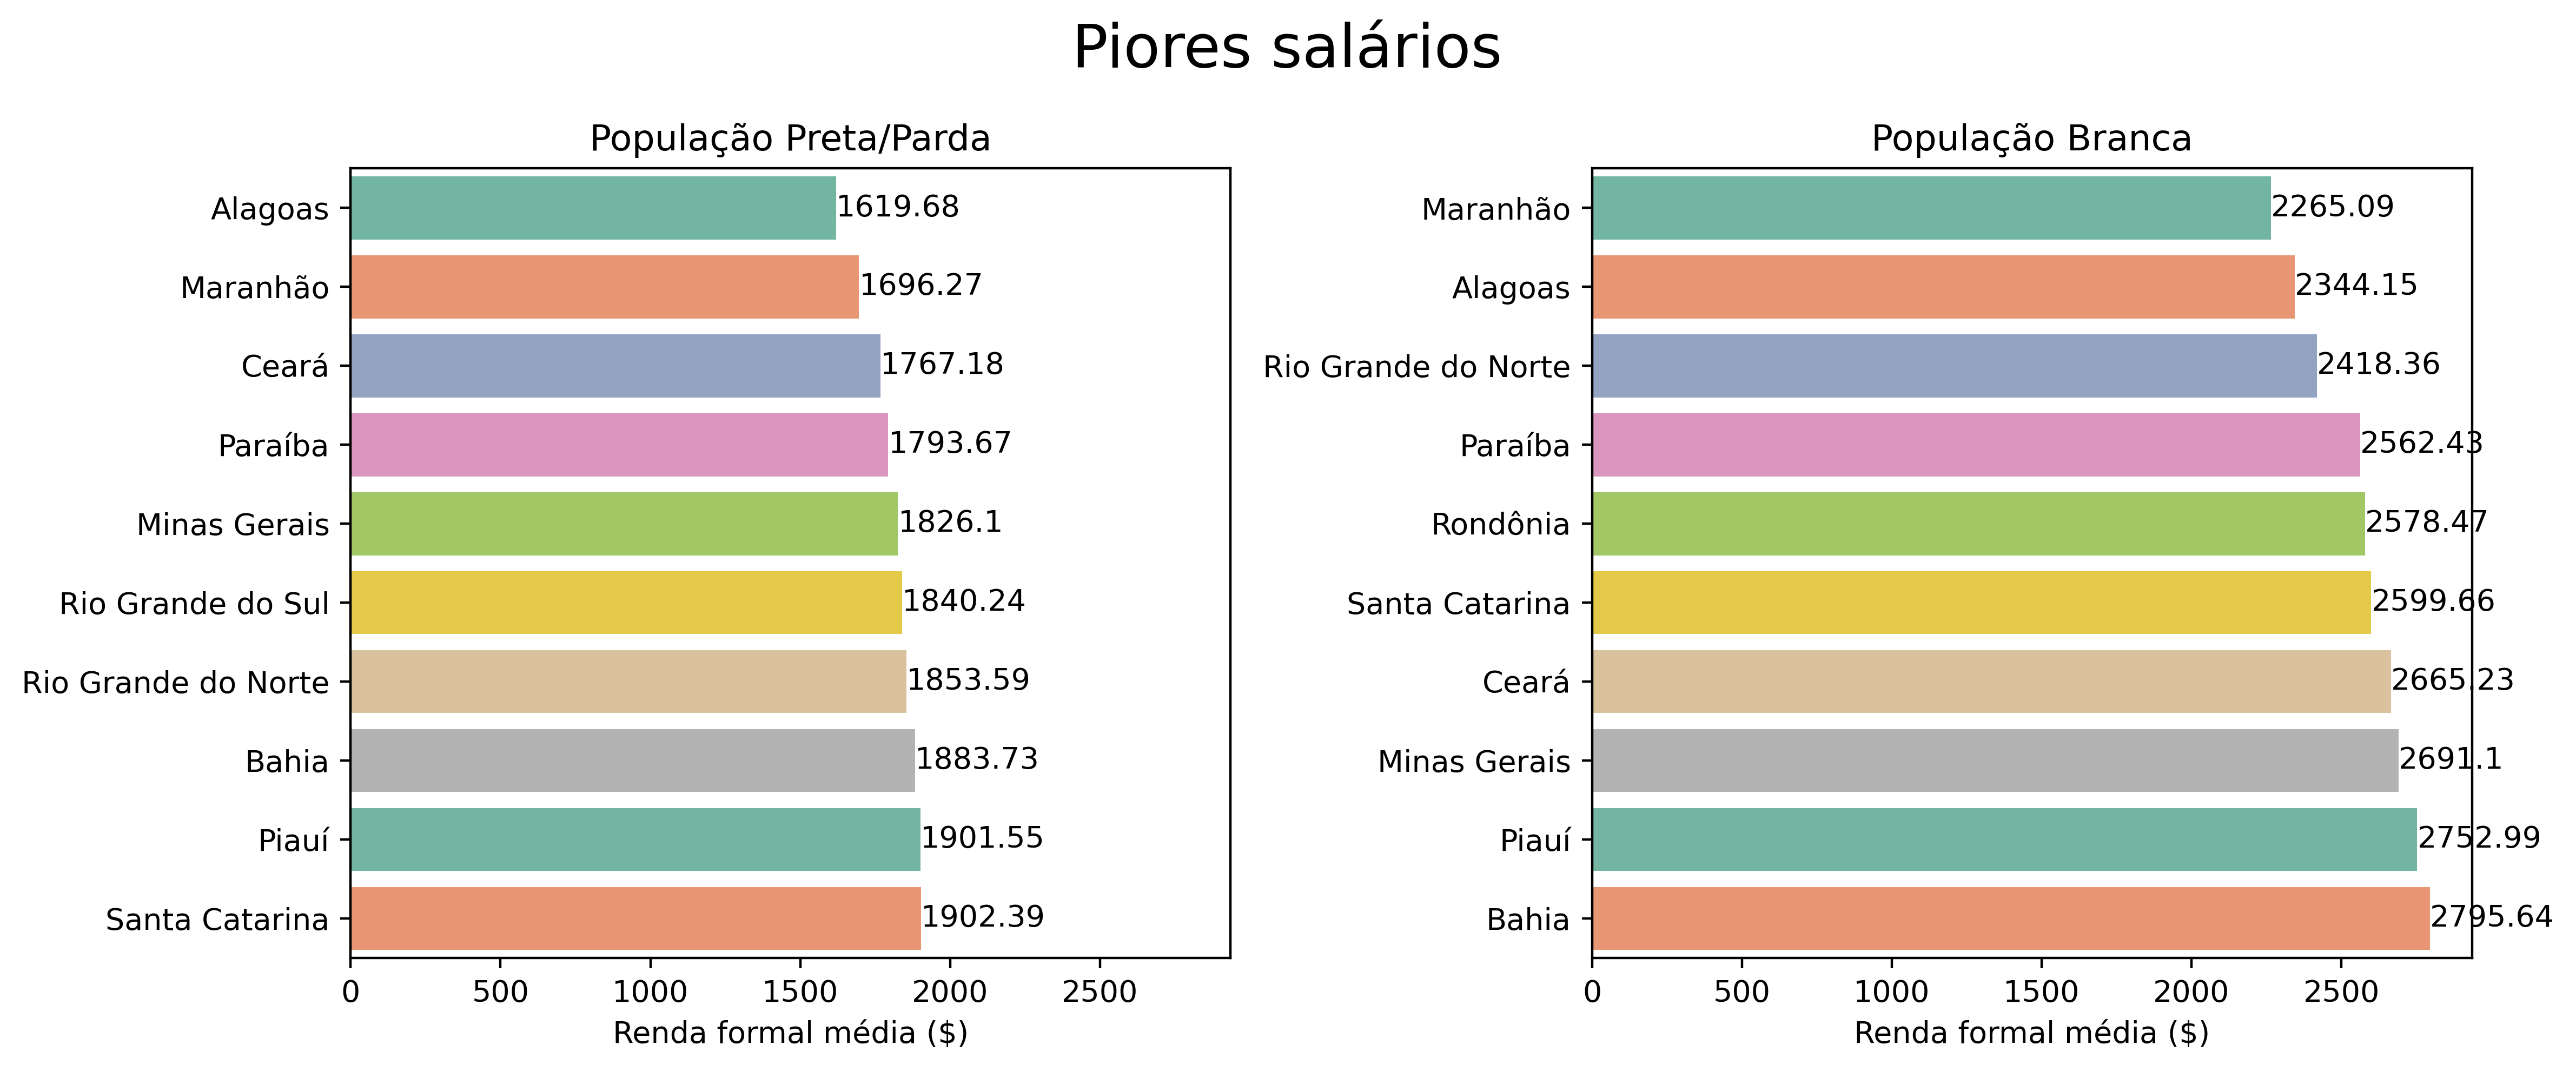

In [26]:
df_preta = df.loc[df['etnia'] =='Preta'].groupby('UF')[['$_renda_med_formal']].mean()
df_preta = df_preta.sort_values(by='$_renda_med_formal', ascending=True)
df_preta = df_preta.iloc[:10,:]

df_branca = df.loc[df['etnia'] =='Branca'].groupby('UF')[['$_renda_med_formal']].mean()
df_branca = df_branca.sort_values(by='$_renda_med_formal', ascending=True)
df_branca = df_branca.iloc[:10,:]

fig, axes = plt.subplots(1, 2, figsize=(12,5), dpi=400, sharex=True)

ax = sns.barplot(ax=axes[0], y = df_preta.index , x = df_preta['$_renda_med_formal'], data = df_preta, palette="Set2")
ax.bar_label(ax.containers[0])
ax.set_ylabel('')
ax.set_xlabel('Renda formal média ($)')
axes[0].set_title('População Preta/Parda')

ax = sns.barplot(ax=axes[1], y = df_branca.index , x = df_branca['$_renda_med_formal'], data = df_branca, palette="Set2")
axes[1].set_title('População Branca')
ax.set_ylabel('')
ax.set_xlabel('Renda formal média ($)')
ax.bar_label(ax.containers[0])

fig.suptitle('Piores salários', size = 20)

fig.tight_layout()

plt.show()

## Visualizações Dinâmicas

- esta sessão contém funções as quais permitem que o usuário insira os dados desejados para análises mais específicas

### Visualizando a evolução dos **INDICADORES** ao longo dos **ANOS**, em cada **REGIÃO**

In [28]:
def grafico_anual_regiao(regiao,coluna):
    
    """
    Função para plotar dois gráficos de linha, separados por ETNIA, dada a REGIÃO e o INDICADOR (COLUNA) pelo usuário.
    
    região: str -> ['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']
    coluna: str -> ['%_etnia', '%_desocupacao',  '%_subutilizacao', '$_renda_med_formal', '$_renda_med_informal', '%_menor_renda_familiar', '%_maior_renda_familiar', '%_taxa_homicidio']
    """
    
    df_regiao = df.loc[(df['regiao'] == regiao)]

    df_regiao_group_p = df_regiao.loc[df_regiao['etnia'] =='Preta'].groupby(['ano','UF'])[[coluna]].mean().unstack("UF")
    df_regiao_group_b = df_regiao.loc[df_regiao['etnia'] =='Branca'].groupby(['ano','UF'])[[coluna]].mean().unstack("UF")

    ufs = df_regiao['UF'].unique()
    datas = df_regiao_group_p.index.to_list()

    fig = go.Figure()

    fig = make_subplots(rows=2,cols=1,
                       subplot_titles=(f"{coluna} da etnia Preta no {regiao}",
                                       f"{coluna} da etnia Branca no {regiao}"))

    for i in ufs:
        fig.add_trace(go.Scatter(x=datas, y=df_regiao_group_p[(coluna, i)].tolist(),
                                 mode='lines+markers', name = i,legendgroup="group",
                                 legendgrouptitle_text="Etnia Preta"),
                      row=1, col=1)

    for i in ufs:
        fig.add_trace(go.Scatter(x=datas, y=df_regiao_group_b[(coluna, i)].tolist(),
                                 mode='lines+markers', name = i,legendgroup="group2",
                                 legendgrouptitle_text="Etnia Branca"),
                     row=2, col=1)


    fig.update_layout(autosize=False,
                      width=1000, 
                      height=500,
                      showlegend=True,
                      plot_bgcolor='white')        

    fig.update_layout(yaxis2_title=coluna,
                      xaxis1=dict(showline=True,linecolor='rgb(204, 204, 204)', showticklabels=True, ticks='outside'),
                      xaxis2=dict(title='Ano',showline=True,linecolor='rgb(204, 204, 204)', showticklabels=True, ticks='outside'))

    fig.show()

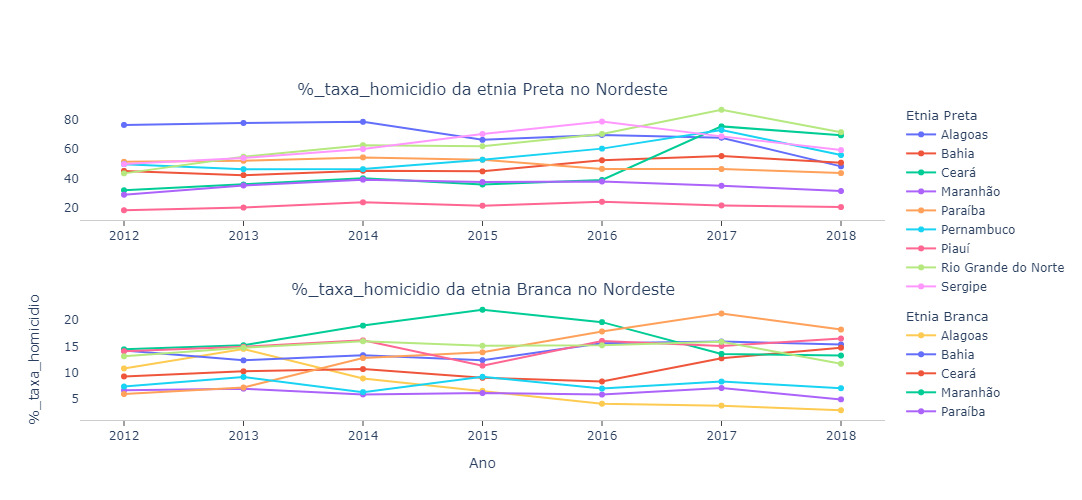

In [29]:
grafico_anual_regiao('Nordeste','%_taxa_homicidio')

### Visualizando os **INDICADORES** em cada **ESTADO** em determinado **ANO** 

In [30]:
def dados_etinia_anual(regiao,coluna,ano):
    
    """
    Função para plotar gráfico de barras, mostrando os dados da COLUNA (INDICADOR) e REGIÃO selecionada pelo usuário
    separados por ETNIA.
    
    região: str -> ['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']
    coluna: str -> ['%_etnia', '%_desocupacao',  '%_subutilizacao', '$_renda_med_formal', '$_renda_med_informal', '%_menor_renda_familiar', '%_maior_renda_familiar', '%_taxa_homicidio']
    ano: int -> [2012, 2013, 2014, 2015, 2016, 2017, 2018]
    """
    
    df_regiao = df.loc[(df['regiao'] == regiao)]
    
    fig = px.bar(df_regiao.loc[(df_regiao['ano'] == ano)], x="UF", y=coluna,
           color='etnia', 
           barmode='group',
           hover_data=['ano'],
           text=coluna,
           height= 500
          )
    fig.update_traces(texttemplate='%{text:.4s}%', textposition='outside')
    

    fig.update_layout(title=f'{coluna} no ano de {ano} - Região {regiao}', yaxis=dict(showticklabels=True,title=''))

    fig.show()

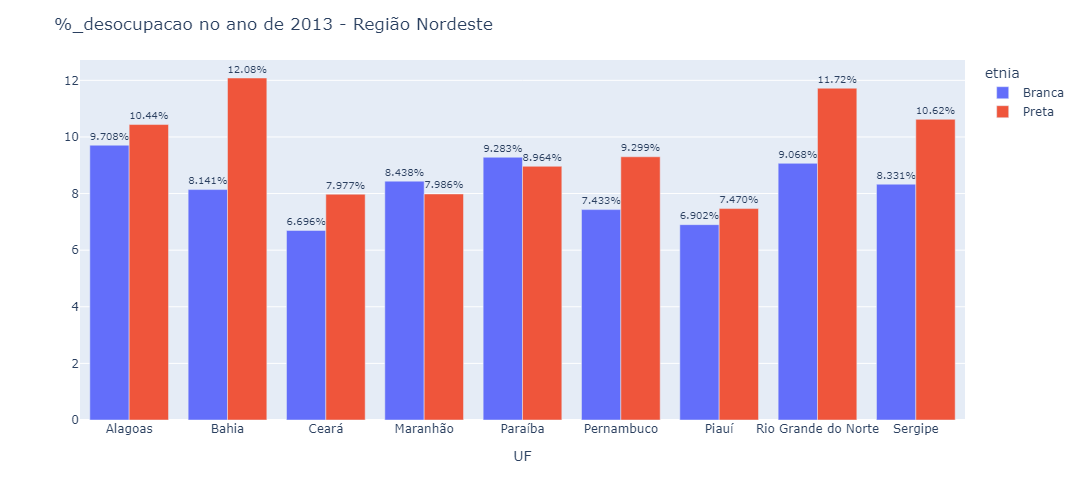

In [31]:
dados_etinia_anual('Nordeste','%_desocupacao',2013)

### Identificando as correlações existentes em **INDICADORES** por **REGIÃO** de cada **ETNIA**

In [32]:
def cor_regiao(regiao,etnia):
    
    """
    Função para plotar mapa de calor (heatmap), mostrando as correlações entre os Índices por REGIÃO e ETNIA selecionada pelo usuário
       
    região: str -> ['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']    
    etnia: str -> ['Branca','Preta']
    """
    
    corr= df.loc[(df['regiao'] == regiao)].corr()    
    matrix = np.triu(corr)
    
    if etnia == 'Preta':
        plt.figure(figsize = (10,5)) #definir tamanho
        sns.heatmap(df.loc[df['etnia'] =='Preta'].loc[(df['regiao'] == regiao)].corr(), annot=True, cmap="Blues",mask=matrix)
        plt.title(f"Correlação da região {regiao} - Etnia Preta", size = 20)
    elif etnia == 'Branca':
        plt.figure(figsize = (10,5)) #definir tamanho
        sns.heatmap(df.loc[df['etnia'] =='Branca'].loc[(df['regiao'] == regiao)].corr(), annot=True, cmap="Blues",mask=matrix)
        plt.title(f"Correlação da região {regiao} - Etnia Branca", size = 20)
    plt.show()

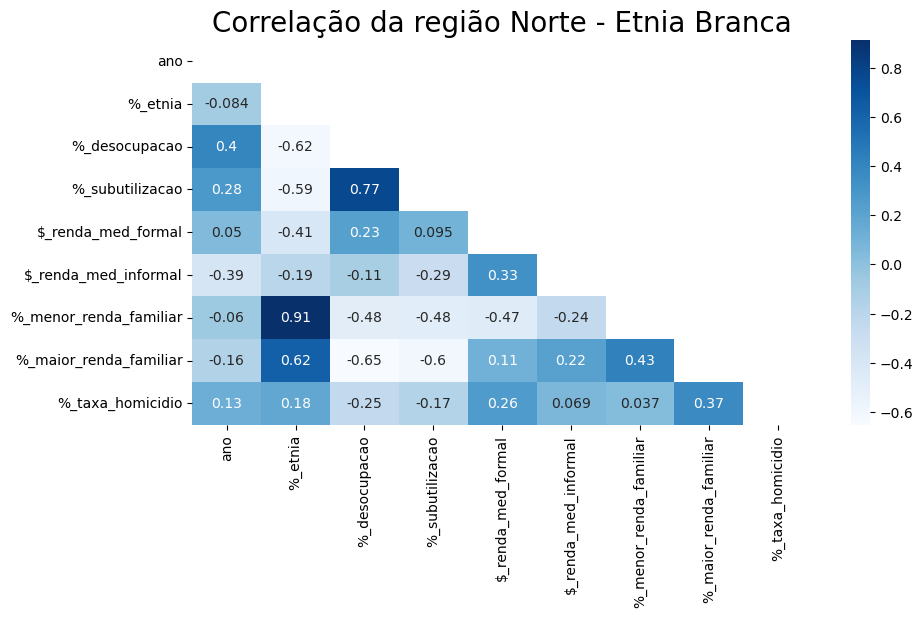

In [33]:
cor_regiao('Norte','Branca')

### Realizando Regressão Linear entre dois **INDICADORES** por **REGIÃO** e **ETNIA**

In [34]:
def reg_por_regiao(coluna1,coluna2,regiao,etnia):
    
    """
    Função para plotar mapa de calor (heatmap), mostrando as correlações entre os Índices por REGIÃO (INDIVIDUAL ou TODAS) e ETNIA selecionada pelo usuário
    
    coluna1, coluna2: str -> ['%_etnia', '%_desocupacao',  '%_subutilizacao', '$_renda_med_formal', '$_renda_med_informal', '%_menor_renda_familiar', '%_maior_renda_familiar', '%_taxa_homicidio']
    região: str -> ['todas','Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']    
    etnia: str -> ['Branca','Preta']
    """
    
    if etnia == 'Preta':
        if regiao == 'todas':
            sns.regplot(x=coluna1, y=coluna2, data= df.loc[df['etnia'] =='Preta'])
            plt.ylim(0,)
            plt.xlabel(coluna1, size = 12)
            plt.ylabel(coluna2, size = 12)
            plt.title("Regressão Linear - TODAS as Regiões - Etnia Preta)", size = 15)
        else:
            sns.regplot(x='%_etnia', y='%_subutilizacao', data= df.loc[df['etnia'] =='Preta'].loc[(df['regiao'] == regiao)])
            plt.ylim(0,)
            plt.xlabel(coluna1, size = 12)
            plt.ylabel(coluna2, size = 12)
            plt.title(f"Regressão Linear - Região {regiao} - Etnia Preta", size = 15)

    elif etnia == 'Branca':
        if regiao == 'todas':
            sns.regplot(x=coluna1, y=coluna2, data= df.loc[df['etnia'] =='Branca'])
            plt.ylim(0,)
            plt.xlabel(coluna1, size = 12)
            plt.ylabel(coluna2, size = 12)
            plt.title("Regressão Linear - TODAS as Regiões - Etnia Branca", size = 15)
        else:
            sns.regplot(x='%_etnia', y='%_subutilizacao', data= df.loc[df['etnia'] =='Branca'].loc[(df['regiao'] == regiao)])
            plt.ylim(0,)
            plt.xlabel(coluna1, size = 12)
            plt.ylabel(coluna2, size = 12)
            plt.title(f"Regressão Linear - Rgião {regiao} - Etnia Branca", size = 15)
        

    plt.show()

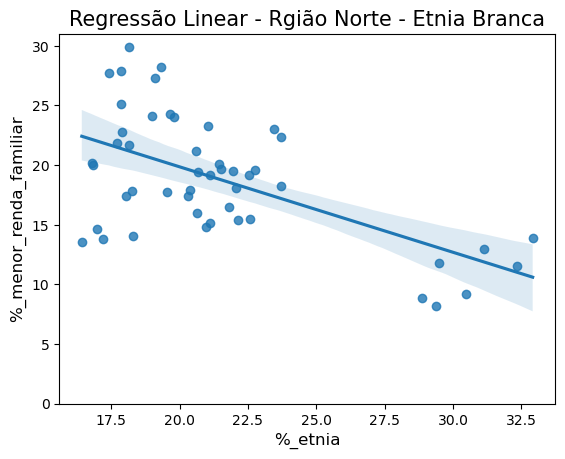

In [35]:
reg_por_regiao('%_etnia','%_menor_renda_familiar','Norte','Branca')

### Desvendando as diferenças em cada **INDICADOR** por **REGIÃO**

In [36]:
def indicador_x_populacao(regiao,coluna):
    
    """
    Função que criar um Gráfico de Dispersão (Scatter plot) com os dados da REGIÃO e ÍNDICE (COLUNA) selecionado pelo usuário
    
    região: str -> ['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']   
    coluna: str -> ['%_etnia', '%_desocupacao',  '%_subutilizacao', '$_renda_med_formal', '$_renda_med_informal', '%_menor_renda_familiar', '%_maior_renda_familiar', '%_taxa_homicidio']
        
    """
    
    df_regiao = df.loc[(df['regiao'] == regiao)]

    x = df_regiao['etnia'].tolist()
    y = df_regiao[coluna].tolist()
    colors = df_regiao[coluna].tolist()
    area = df_regiao['%_taxa_homicidio'].tolist()

    ax= plt.scatter(x, y, s=area, c=colors, alpha=0.4)
    
    plt.title(f"Região {regiao}: {coluna} entre 2012 e 2018", size = 12)    
    plt.ylabel(coluna, size = 12)    
    plt.colorbar()

    plt.show()

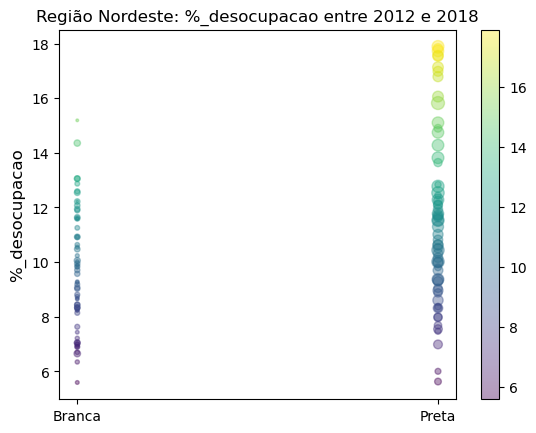

In [37]:
indicador_x_populacao('Nordeste','%_desocupacao')

### Uso do Boxplot em todos **INDICADORES** dada a **REGIÃO** e **ETNIA**

In [38]:
#matplotlib para gerar a estrutura da figura
def boxplot_por_regiao_e_etnia(regiao,etnia):
    
    """
    Função para criar Boxplots dos INDICADORES por REGIÃO e ETNIA selecionada pelo usuário
    
    região: str -> ['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']   
    etnia: str -> ['Branca','Preta']
        
    """
    
    df_num = df.iloc[:,4:]
    fig, axes = plt.subplots(nrows = 2, ncols = int(df_num.shape[1]/2), 
    figsize = (20,10))   

    df_regiao = df.loc[(df['regiao'] == regiao)]
    
    column=0
    row = 0
    for col in df_num.columns:
      # seaborn para fazer os plots dentro de cada "ax" (em "axes")
      sns.boxplot(data = df_regiao.loc[(df['etnia'] == etnia)], y=col, ax=axes[row,column],
      width = 0.2)
      if column < 3:
        column += 1
      else: 
        column = 0
        row += 1
    
    plt.text(-2.9, 0, f"Boxplots da Região {regiao} da Etnia {etnia}", size = 20)
    plt.show()

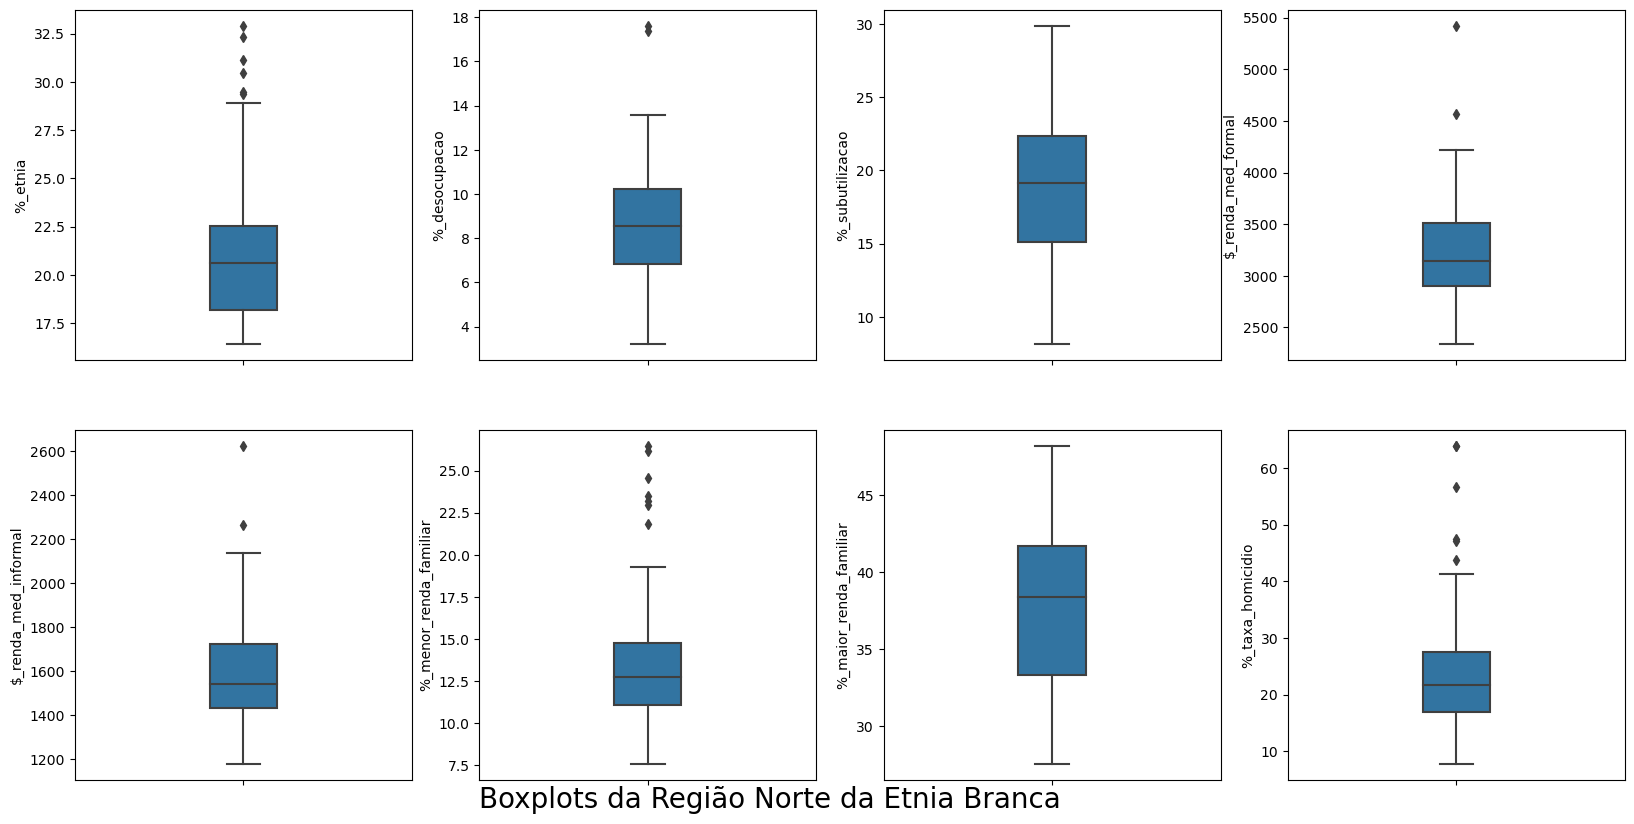

In [39]:
boxplot_por_regiao_e_etnia('Norte','Branca')

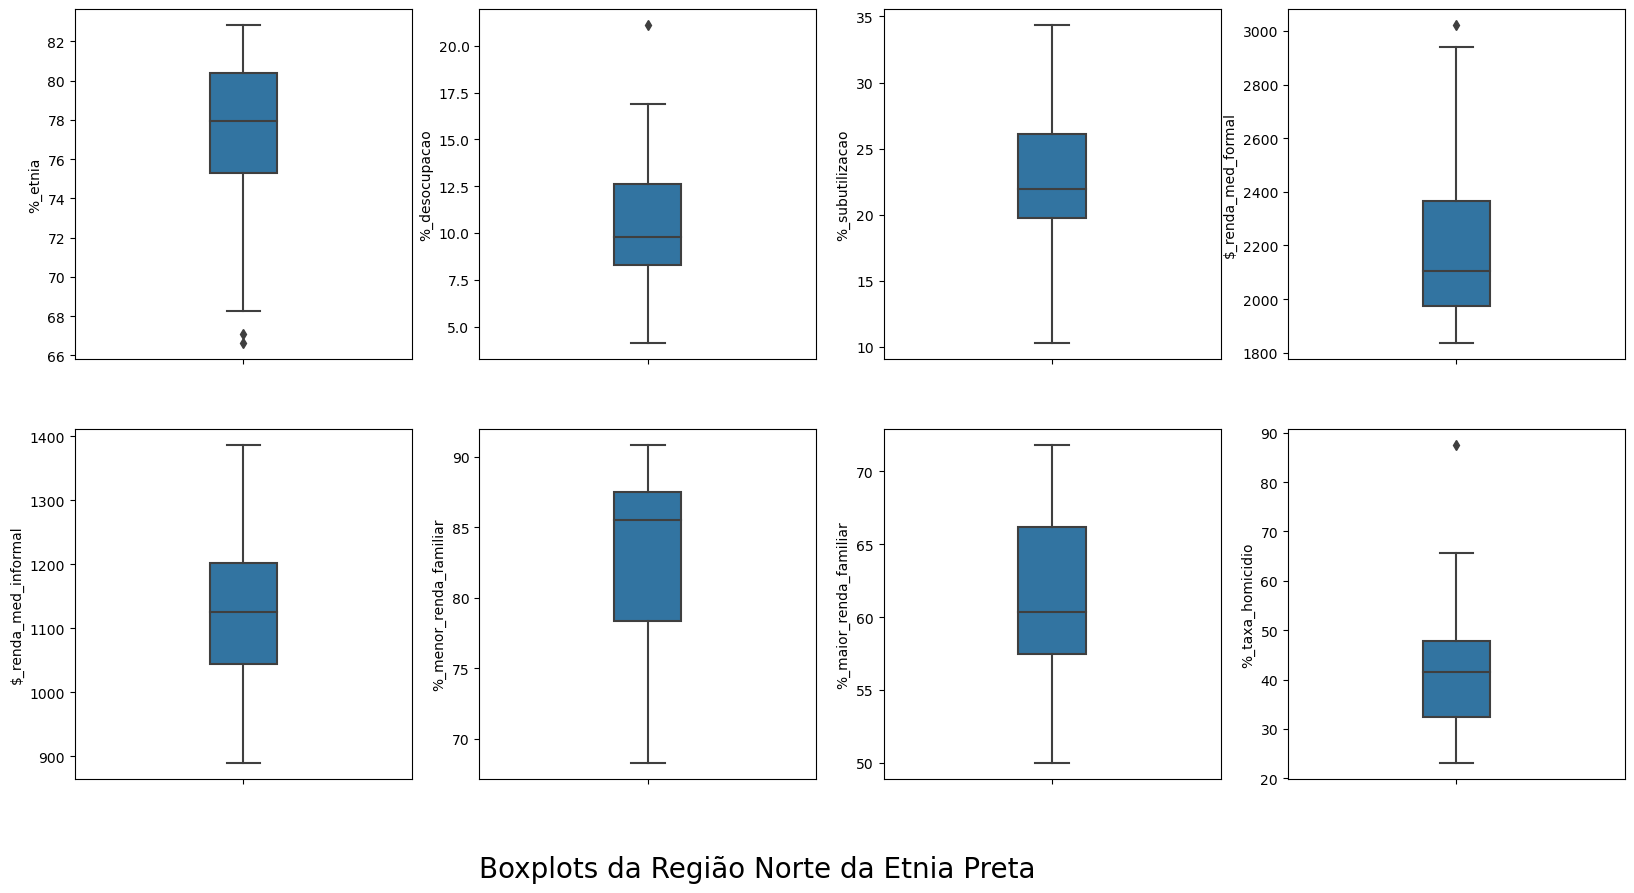

In [40]:
boxplot_por_regiao_e_etnia('Norte','Preta')

### Uso do Boxplot para entender a diferença entre as **ETNIAS**

In [42]:
def boxplot_regiao_coluna_e_etnia(regiao,coluna):
    
    """
    Função que mostra em todas as UFs, o Boxplot dos valores de um INDICADOR (COLUNA) e REGIÃO selecionada pelo usuário, nas duas ETNIAS. 
    
    região: str -> ['Sul', 'Sudeste', 'Norte', 'Nordeste', 'Centro-Oeste']
    coluna: str -> ['%_etnia', '%_desocupacao',  '%_subutilizacao', '$_renda_med_formal', '$_renda_med_informal', '%_menor_renda_familiar', '%_maior_renda_familiar', '%_taxa_homicidio']
        
    """
    
    df_regiao = df.loc[(df['regiao'] == regiao)]
    df_graph= df_regiao.loc[df_regiao['etnia'] == 'Preta'].groupby(['ano','UF'])[[coluna]].mean().unstack("UF")
    df_graph2= df_regiao.loc[df_regiao['etnia'] == 'Branca'].groupby(['ano','UF'])[[coluna]].mean().unstack("UF")  
    df_graph.plot(kind='box', vert=False, figsize=(9,6), 
                  title= f'Boxplot da Região {regiao} - Etnia Preta  - entre 2012 a 2018')
  
    df_graph2.plot(kind='box', vert=False, figsize=(9,6), 
                   title= f'Boxplot da Região {regiao} - Etnia Branca  - entre 2012 a 2018')
                   
    plt.show()

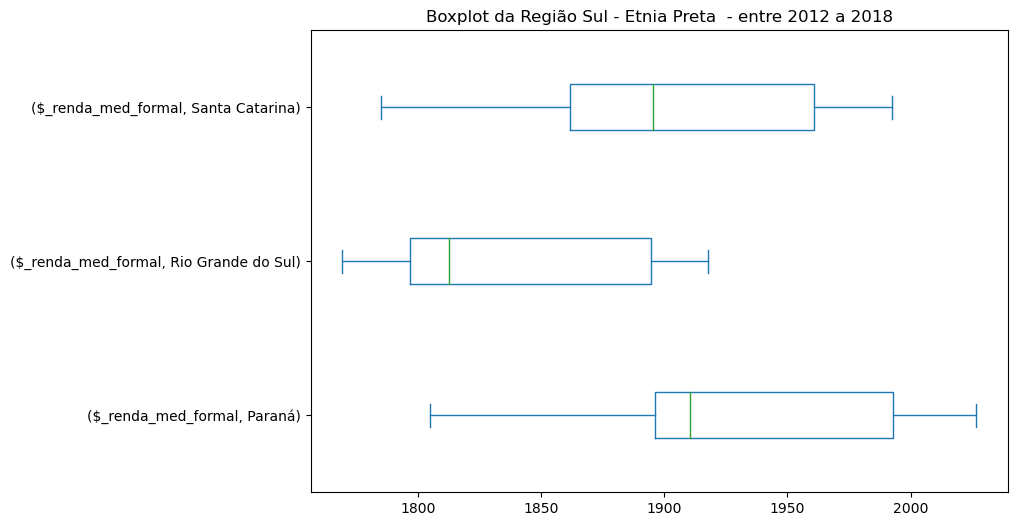

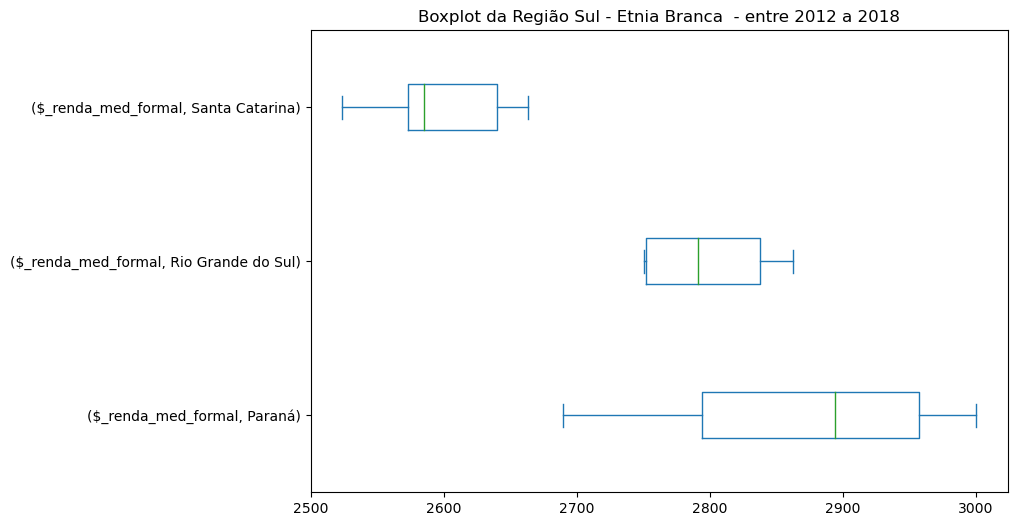

In [43]:
boxplot_regiao_coluna_e_etnia('Sul','$_renda_med_formal')

### Choropleth Mapbox: Um mapa da realidade brasileira

- Uso da ferramenta Cloropleth Mapbox para mostrar a realidade do Brasil através dos **INDICADORES** e sua evolução ao longo dos **ANOS**

In [44]:
import json
from urllib.request import urlopen

In [45]:
with urlopen('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson') as response:
 Brazil = json.load(response)

In [46]:
state_id_map = {}
for feature in Brazil['features']:
 feature['id'] = feature['properties']['name']
 state_id_map[feature['properties']['sigla']] = feature['id']

In [47]:
# carregamento de um novo arquivo Excel que melhor se adapta a ferramenta do Choropleth Mapbox editado manualmente

df_dados = pd.read_excel('dados-desigualdade-racial-br-02.xlsx', engine='openpyxl')

In [48]:
df_dados.head()

ano regiao        UF   %_branca    %_preta  %_total_desocupacao  \
0  2012  Norte  Rondônia  32.916534  66.622655             5.655411   
1  2012  Norte      Acre  23.469459  75.786733             8.992067   
2  2012  Norte  Amazonas  20.368686  77.414330             9.694126   
3  2012  Norte   Roraima  20.633053  76.102986             7.833089   
4  2012  Norte      Pará  19.633494  79.841436             7.349961   

   %_branca_desocupacao  %_preta_desocupacao  %_total_subutilizacao  \
0              4.821399             6.099280              16.276200   
1              8.419465             9.136451              23.703997   
2              8.772458            10.081004              20.047527   
3              6.629173             8.265745              20.686836   
4              7.229641             7.345850              26.199516   

   %_branca_subutilizacao  %_preta_subutilizacao  $_renda_med_formal_total  \
0               13.864796              17.457551               2116.796677   
1               23.007207              23.889992               2405.937063   
2               17.875427              20.747966               2542.233574   
3               15.968468              21.957377               2896.399404   
4               24.255623              26.675286               2266.697674   

   $_renda_med_formal_branca  $_renda_med_formal_preta  \
0                2647.195008               1836.014570   
1                2997.135307               2171.035524   
2                3851.814921               2091.586198   
3                4060.228983               2495.809736   
4                2985.746185               2034.514557   

   $_renda_med_informal_total  $_renda_med_informal_branca  \
0                 1260.071122                  1365.373756   
1                 1238.231289                  1763.011369   
2                 1374.051520                  2264.729378   
3                 1455.611208                  2079.748141   
4                 1040.701461                  1314.053336   

   $_renda_med_informal_preta  %_menor_renda_familiar_branca  \
0                 1215.534663                      26.186922   
1                 1089.298296                      19.267563   
2                 1161.919880                      13.277180   
3                 1325.344447                      12.762452   
4                  982.824240                      10.126369   

   %_menor_renda_familiar_preta  %_maior_renda_familiar_branca  \
0                     73.671317                      47.395091   
1                     78.385809                      40.511748   
2                     83.265566                      39.578933   
3                     81.223433                      48.214949   
4                     89.401249                      33.755691   

   %_maior_renda_familiar_preta  %_taxa_homicidio_branca  \
0                     51.722534                    24.17   
1                     58.918988                     9.92   
2                     58.344837                    18.46   
3                     51.334521                    41.21   
4                     65.392204                    15.73   

   %_taxa_homicidio_preta  
0                   33.07  
1                   30.12  
2                   42.46  
3                   30.81  
4                   47.11

In [49]:
def plotar_map(coluna):
       
    """
    Função para criar um "Choropleth Map", a partir do INDICADOR (COLUNA), inserido pelo usuário, ao longo dos ANOS. 
    
    coluna: str -> ['%_branca', '%_preta','%_total_desocupacao',
                   '%_branca_desocupacao', '%_preta_desocupacao', '%_total_subutilizacao',
                   '%_branca_subutilizacao', '%_preta_subutilizacao',
                   '$_renda_med_formal_total', '$_renda_med_formal_branca',
                   '$_renda_med_formal_preta', '$_renda_med_informal_total',
                   '$_renda_med_informal_branca', '$_renda_med_informal_preta',
                   '%_menor_renda_familiar_branca', '%_menor_renda_familiar_preta',
                   '%_maior_renda_familiar_branca', '%_maior_renda_familiar_preta',
                   '%_taxa_homicidio_branca', '%_taxa_homicidio_preta']

    """
    
    fig = px.choropleth_mapbox(
     df_dados, 
     locations = 'UF', #definir os limites no mapa
     geojson = Brazil, #dados geográficos
     color = coluna, #definindo a cor da escala
     hover_name = 'UF', #informações na caixa
     hover_data =['%_preta','%_branca',coluna],
     title = f'Mapa Anual - {coluna}', #título do mapa
     mapbox_style = 'carto-positron', #definindo um estilo de mapa
     center={'lat':-14, 'lon': -55},#definir os limites que serão plotados
     opacity = 0.5, #opacidade da cor do mapa, para aparecer o fundo
     animation_frame = 'ano', #criando o aplicativo com base nos anos
     height= 600
    )
    fig.show()

In [ ]:
plotar_map('%_taxa_homicidio_preta')

## Condiderações Finais


Os dados analisados evidenciaram que a população **preta/parda** no Brasil apresentaram, em sua maioria, **indicadores significativamente desfavoráveis** em relação à população branca. Essas disparidades podem ser consideradas um reflexo do **racismo estrutural que permeia a sociedade brasileira**, que, mesmo com as leis que garantem a igualdade entre os povos, ainda precisa de muitas mudanças sociais para combater tais desigualdades.

O mais impactante dos casos analisados foi enxergar a **taxa de homícidio** como indicador. As análises demonstraram que, por exemplo, na região Nordeste, a população preta/parda é **mais de 4 vezes impactada pela violência do que população branca**. Além disso, foi percebido que em **todas as regiões do Brasil**, a violência para com a população preta obteve **indíces muitos superiores** que a população branca.

A populção branca se destacou nos indicadores de **Renda Média Formal e Informal**, onde em alguns casos, os valores chegaram a mostrar uma **desigualdade** em suas rendas equivalentes ao **dobro dos valores da população preta/parda**. E mesmo avaliando regiões onde a distribuição étnica é, em sua grande parte, de **população preta**, essa mesma maioria, recebia **salários inferiores** do que a população minoritária branca.

Com isso, é crucial que se faça **análises e questionamentos sobre a temática racial**, especialmente diante da crescente onda de violência e discriminação que se alastra pelo mundo, pois, somente por meio dessas **discussões e debates embasados em fatos**, é que poderemos avançar em direção à **democracia racial e à justiça social**.

Por fim, a análise desses dados foi fundamental para que eu pudesse desvendar um pouco mais do **racismo estrutural no Brasil**. Endender um pouco mais desse processo histórico, em que, condições de **desvantagem** e **privilégio**, são reproduzidas em diversos âmbitos, como político, econômico, cultural e nas relações cotidianas.

Espero que estas análises tenham feito sentido para você (o quanto fez para mim), pois precisamos enfrentar essas desigualdades de frente, **juntos**, a fim de construir uma **sociedade mais justa e igualitária**. Muito obrigado pela sua leitura!

(caso queira fazer algum comentário me envie um email: rodrigosantospinheiro@gmail.com)

<img src="https://i.postimg.cc/59wWj0fz/final.png" style="width:620px; height:360px">